# __BÀI BÁO CÁO MÔ HÌNH DỰ ĐOÁN GIÁ NHÀ Ở__

<hr>

## **Vấn đề đặt ra**

Trong bối cảnh thị trường bất động sản ngày càng biến động, việc dự đoán giá nhà trở nên quan trọng hơn bao giờ hết. Sự biến động này không chỉ ảnh hưởng đến người mua và người bán nhà, mà còn tác động lớn đến các nhà đầu tư, các ngân hàng và các cơ quan quản lý. Việc hiểu và dự đoán giá nhà có thể giúp tối ưu hóa quyết định đầu tư, quản lý rủi ro và tiết kiệm chi phí.

Bài báo cáo phân tích các yếu tố ảnh hưởng đến giá nhà và sử dụng các thuật toán học máy để đưa ra một mô hình dự đoán giá nhà tối ưu và hiệu quả.  Qua đó, nhóm chúng em hy vọng sẽ cung cấp được những thông tin hữu ích và có giá trị thực tiễn cho các bên liên quan trong thị trường bất động sản.



---
## __Các phương pháp được sử dụng__

**Thu thập và làm sạch dữ liệu:**
  - *Nguồn dữ liệu:* Nhóm thu thập dữ liệu từ các bài đăng của [trang web bất động sản](https://batdongsan.vn/ban-nha/) . Các dữ liệu này bao gồm giá nhà, diện tích, vị trí, cùng một số thuộc tính khác như giấy tờ pháp lý, nội thất. Dữ liệu được thu thập từ các quận huyện của Thành phố Hồ Chí Minh trong thời gian năm 2023.</li>
  - *Xử lý dữ liệu lỗi:* Điều chỉnh giá trị và loại bỏ các dữ liệu rác.

  
**Phân tích dữ liệu:**
- *Phân tích mô tả:* Sử dụng các thống kê mô tả để hiểu rõ hơn về phân phối và mối quan hệ giữa các biến số trong dữ liệu.
- *Phân tích tương quan:* Tiến hành phân tích tương quan để xác định mối quan hệ giữa giá nhà và các yếu tố khác như vị trí, diện tích, số phòng, ...


**Tiền xử lý dữ liệu:**
- *Xử lý dữ liệu khuyết:* loại bỏ hoặc gán các giá trị rỗng
- *Xử lý giá trị ngoại lại*
- *Chuẩn hóa và mã hóa*
- *Thay đổi kiểu dữ liệu phù hợp*


**Xây dựng mô hình dự đoán:**
- *Mô hình học máy:* Áp dụng mô hình cơ bản (Hồi quy tuyến tính) cùng với một số mô hình tiên tiến như Rừng ngẫu nhiên, Máy vector hỗ trợ để dự đoán
- *Điều chỉnh siêu tham số:* tìm kiếm các siêu tham số nhằm giúp tối ưu hóa mô hình


**Đánh giá mô hình:**
- *Mô hình cơ sở:* Dùng để so sánh với các mô hình tiên tiến
- *Kiểm định chéo:* Sử dụng kiểm định chéo nhằm mô hình khách quan hơn và hạn chế việc bỏ qua các mẫu tiềm năng.
- *Đánh giá hiệu suất:* Sử MAE, MSE và RMSE để đánh giá hiệu suất từng mô hình
- *Model Benchmarking:* So sánh các chỉ số của các mô hình nhằm tìm ra mô hình tối ưu nhất

**Các công cụ được sử dụng**
- Cào dữ liệu: Beautiful Soup, Regex
- Xử lý dữ liệu: Pandas, Numpy
- Trực quan hóa dữ liệu: Matplotlib, Seaborn
- Mô hình học máy: Sklearn

---
## **Mã lệnh minh họa**
Tiếp theo là phần mã cụ thể để minh họa cho phần phương pháp của nhóm. Nhóm sử dụng chính là Python và một số thư viện chuyên dụng để giải quyết vấn đề đưa ra.
Ở các ô chứa mã lệnh siêu tham số, vì chúng em đã tìm ra được từ trước nên các mã lệnh này được để ở dạng comment để tránh tốn thời gian chạy tổng quát.

### **I. Bộ dữ liệu**

In [ ]:
import pandas as pd
import numpy as np
import re

# from google.colab import files
# files.upload()

dataset = pd.read_csv('/content/house_data.csv')

Bộ dữ liệu bao gồm thuộc tính của ngôi nhà cùng các thông tin bài đăng bao gồm tiêu đề và nội dung. Tuy vậy không phải bài đăng nào ở trên website đều là bán nhà, vì vậy ta cần làm sạch trước khi tiến đến các bước tiếp theo.

### **II. Làm sạch dữ liệu**

####**1. Giá trị `price`**

Khi được cào về từ website, các giá tiền thường bị người dùng ghi nhầm đơn vị, ví dụ 3,890,000,000 tỷ nhưng giá trị bán thực tế lại là 3.89 tỷ. Vì vậy cần điều chỉnh lại các giá trị này

In [ ]:
def clean_price(price, x=5):
    if type(price) == str:
        price = price.replace('giá','').replace('bán','').replace(':','')

        # Có 3 đơn vị được gặp là tỷ, triệu và nghìn, tuy vậy các giá trị ghi nghìn là vô lý nên sẽ không nhận
        is_billions = re.search(r'(tỷ|tỉ)', price)
        if is_billions:
            normal_format = re.search(r'(\d+(\.\d+)?|\d+(\,\d+)?)', price)

            if normal_format:
                number = float(normal_format.group().replace(',', '.').replace('x', f'{x}')) # trường hợp giá tiền là 7.x tỷ hoặc 5,8 tỷ
                # xử lý các trường hợp nhập dư số không
                if number > 1e+12:
                    number = number / 1e+12
                elif number < 1e+12 and number >= 1e+9:
                    number = number / 1e+9
                elif number < 1e+9 and number >= 1e+6:
                    number = number / 1e+6
                elif number < 1e+6 and number >= 1e+3:
                    number = number / 1e+3
                elif number >= 200 and number < 1e+3:
                    number = np.nan
                return number
            else:
                number = float(price.replace(' ','').replace('tỷ','.').replace('tỉ','.')) # trường hợp 5 tỷ 8
                return number

        elif not is_billions:
            is_millions = re.search(r'triệu', price)
            if is_millions:
                number = float(price.replace('triệu', '.').replace(' ', ''))
                return number / 1e+3

    return np.nan

dataset['price'] = dataset['price'].apply(clean_price)

In [ ]:
# loại bỏ các giá trị price không tồn tại
na_dataset = dataset[dataset['price'].isna()]
dataset = dataset.dropna(subset=['price'])

#### **2. Loại bỏ giá trị gây nhiễu**

- Bài đăng thuê nhà: Trong bài đăng sẽ tồn tại cho thuê hoặc không. Nếu như **chỉ cho thuê**, ta sẽ không nhận dữ liệu. Ta sẽ dựa vào `t_rent` (chỉ cho thuê lấy từ tiêu đề) và `c_rent` (chỉ cho thuê được lấy từ nội dung).

In [ ]:
dataset = dataset[~((dataset['t_rent'] == True) | (dataset['c_rent'] == True))]

- Bài đăng quảng cáo: Trong bộ dữ liệu cũng tồn tại các bài đăng quảng cáo, để loại bỏ chúng, ta kiểm tra số lượng ký tự của nội dung và thuộc tính`square`.

In [ ]:
dataset['content_length'] = dataset['content'].copy().apply(len)
# Nếu số lượng ký tự > 1000 và giá trị square không tồn tại thì bỏ
dataset = dataset[~((dataset['content_length'] > 1000) & (dataset['square'].isna()))]

- Bài đăng bán tòa nhà: Vì mục tiêu của nhóm là dự đoán giá nhà ở, thế nên các dữ liệu về tòa nhà sẽ không tính vào.

In [ ]:
def check_building(content):
    if type(content) == str:
        if re.search(r'(tòa|tòa nhà|building)', content):
            return True
    return False

dataset['is_building'] = dataset['content'].copy().apply(check_building)
dataset = dataset[~(dataset['is_building'] == True)]

#### **3. Xử lý các giá trị bị lặp**

Để loại bỏ các dữ liệu lặp, ta sẽ xem xét nội dung và tiêu đề có giống nhau không.

In [ ]:
dataset = dataset.drop_duplicates(subset=["content", "title"], keep='first')

**Loại bỏ các cột thừa**

Các cột này sẽ không có liên quan đến thuộc tính của căn nhà

In [ ]:
dataset = dataset.drop(['content_length', 'is_building', 't_rent', 'c_rent', 'content', 'title'], axis=1)

### **III. Phân tích dữ liệu**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns



#### **1. Sơ lược bộ dữ liệu giá nhà**

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7908 entries, 0 to 10048
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   post_code        7908 non-null   int64  
 1   post_date        7908 non-null   object 
 2   district         7908 non-null   object 
 3   square           7754 non-null   float64
 4   bedroom          5982 non-null   float64
 5   bathroom         5701 non-null   float64
 6   house_direction  2580 non-null   object 
 7   has_balcony      7908 non-null   bool   
 8   has_furniture    7908 non-null   bool   
 9   has_legal_info   7908 non-null   bool   
 10  is_hurried       7908 non-null   bool   
 11  floor            7908 non-null   int64  
 12  has_basement     7908 non-null   bool   
 13  house_type       7908 non-null   object 
 14  price            7908 non-null   float64
dtypes: bool(5), float64(4), int64(2), object(4)
memory usage: 718.2+ KB


In [ ]:
dataset.describe()

,post_code,square,bedroom,bathroom,floor,price
count,7908.000000,7754.000000,5982.000000,5701.000000,7908.000000,7908.000000
mean,267201.025797,75.940366,3.553828,3.362919,3.039833,8.685787
std,10308.444963,107.830714,3.100991,3.035929,2.059150,19.989627
min,247475.000000,1.518000,1.000000,1.000000,0.000000,0.360000
25%,258128.750000,44.000000,2.000000,2.000000,2.000000,4.000000
50%,266433.000000,60.000000,3.000000,3.000000,3.000000,5.550000
75%,276792.250000,80.000000,4.000000,4.000000,4.000000,8.365000
max,285164.000000,6000.000000,111.000000,111.000000,81.000000,840.000000


In [ ]:
dataset.nunique()

post_code          7908
post_date          7777
district             23
square              621
bedroom              30
bathroom             31
house_direction       8
has_balcony           2
has_furniture         2
has_legal_info        2
is_hurried            2
floor                13
has_basement          2
house_type            4
price               661
dtype: int64

#### **2. Kiểm tra dữ liệu bị thiếu**

In [ ]:
(dataset.isna().sum()/len(dataset)*100).round(2)

post_code           0.00
post_date           0.00
district            0.00
square              1.95
bedroom            24.36
bathroom           27.91
house_direction    67.37
has_balcony         0.00
has_furniture       0.00
has_legal_info      0.00
is_hurried          0.00
floor               0.00
has_basement        0.00
house_type          0.00
price               0.00
dtype: float64

Có 4 thuộc tính chứa giá trị rỗng, trong đó thuộc tính `house_direction` chứa nhiều giá trị rỗng nhất với hơn 67% giá trị.

#### **3. Phân tích tương quan**

Xem xét sự tương quan giữa các thuộc tính số với nhau dùng **phương pháp Pearson**. Phương pháp dùng để đo lường mối quan hệ tuyến tính giữa hai biến, dùng khi dữ liệu theo phân phối chuẩn và ít giá trị ngoại lai

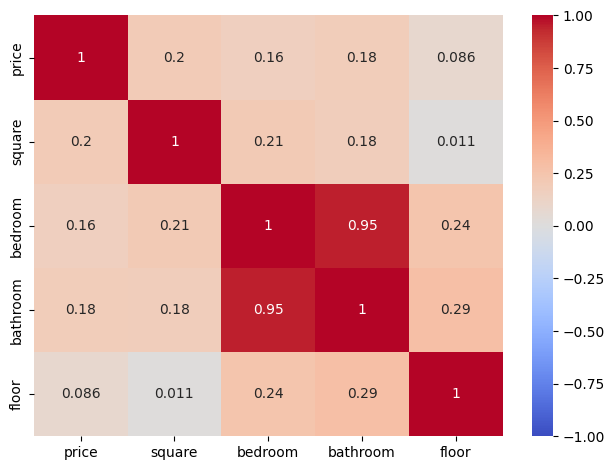

In [ ]:
#Vẽ ma trận tương quan
pearson_correlation_matrix = dataset[['price', 'square', 'bedroom', 'bathroom', 'floor']].corr(method='pearson')
sns.heatmap(pearson_correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.tight_layout()
plt.show()

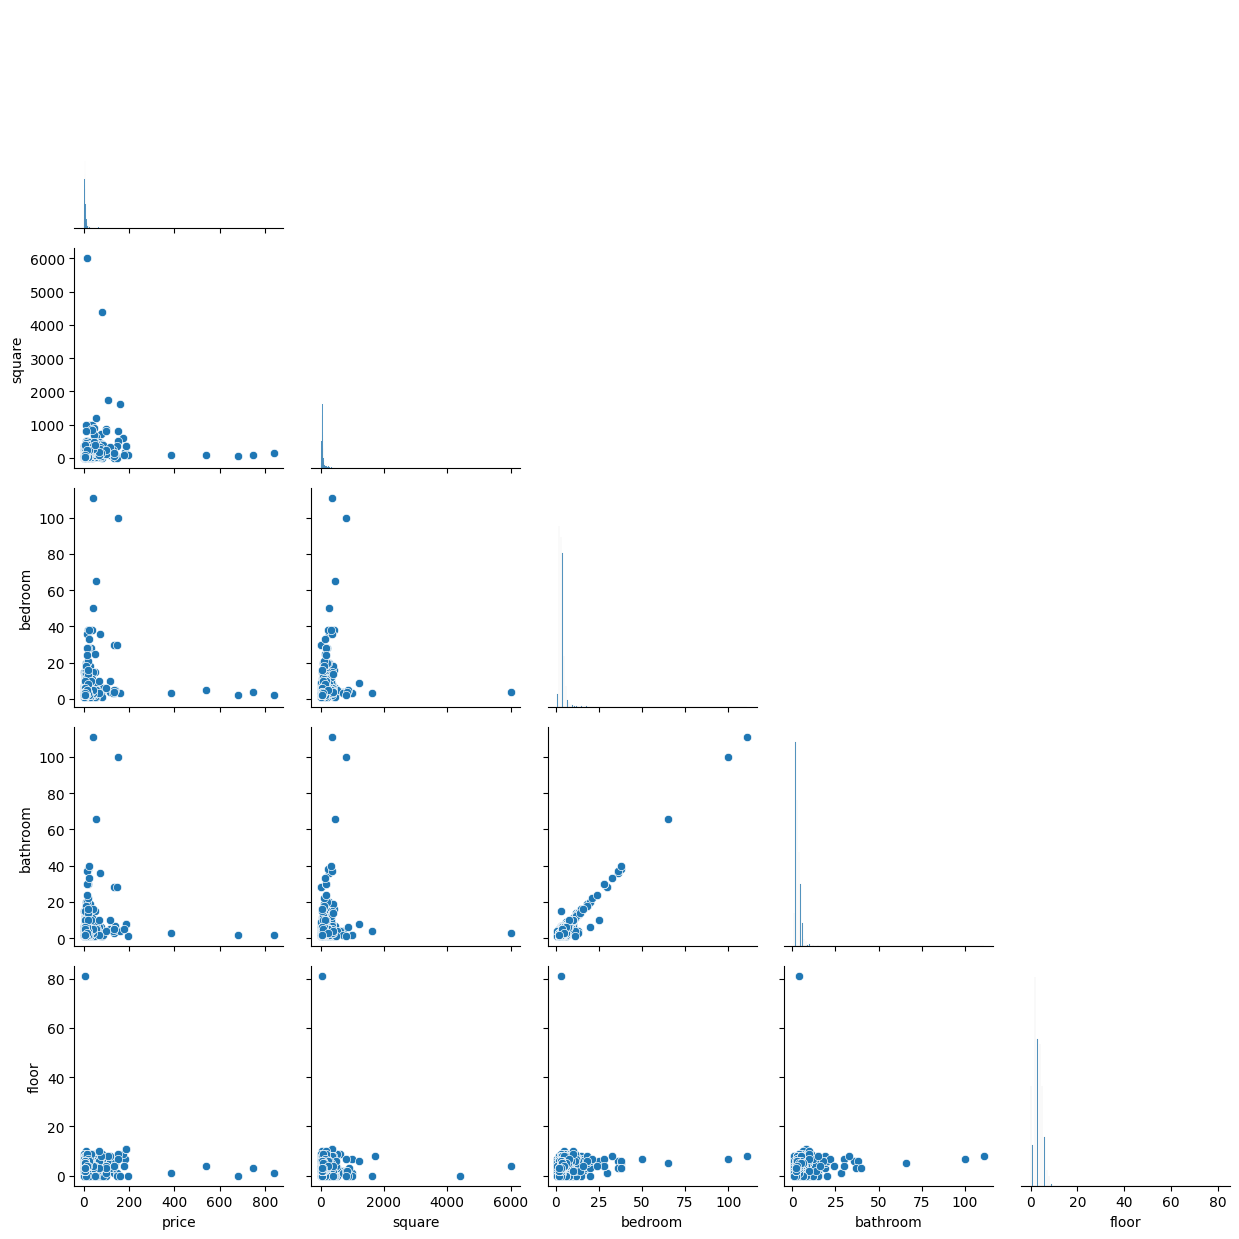

In [ ]:
# vẽ pairplot
sns.pairplot(dataset[['price', 'square', 'bedroom', 'bathroom', 'floor']], corner=True)
plt.tight_layout()
plt.show()

**1. Mối quan hệ giữa các biến:**

- Price và Square: Biểu đồ phân tán cho thấy có một số điểm dữ liệu có giá trị cực đoan, nhưng nhìn chung có xu hướng tích cực giữa giá và diện tích. Tuy nhiên, có một số ngoại lai với diện tích rất lớn nhưng giá không tương xứng.
- Price và Bedroom/Bathroom/Floor: Các biểu đồ phân tán không thể hiện mối quan hệ rõ ràng giữa giá cả và số phòng ngủ/phòng tắm/tầng. Điều này có thể chỉ ra rằng các yếu tố này không phải là yếu tố quyết định chính của giá cả.
- Square và Bedroom/Bathroom/Floor: Có xu hướng tích cực rõ ràng giữa diện tích và số phòng ngủ/phòng tắm, nghĩa là diện tích lớn hơn thường đi kèm với nhiều phòng ngủ/phòng tắm hơn. Tuy nhiên, mối quan hệ với tầng (floor) không rõ ràng.

**2. Phân bố của từng biến:**

- Các biểu đồ histogram dọc theo đường chéo cho thấy sự phân bố của từng biến. Chúng ta có thể nhận thấy rằng:
- Price: Phân bố lệch phải, có nhiều ngôi nhà giá rẻ và một số ít ngôi nhà giá rất cao.
- Square: Phân bố lệch phải, với nhiều ngôi nhà có diện tích nhỏ và một số ít ngôi nhà diện tích lớn.
- Bedroom/Bathroom/Floor: Phân bố của các biến này cũng lệch phải, với phần lớn các ngôi nhà có ít phòng ngủ/phòng tắm và tầng thấp.

**3. Điểm dữ liệu ngoại lai:**

- Một số điểm dữ liệu có giá trị cực đoan (ví dụ: diện tích trên 4000, giá trên 500) có thể là các điểm ngoại lai cần được kiểm tra kỹ lưỡng hơn để xác định liệu chúng có phải là lỗi nhập liệu hay các trường hợp đặc biệt.

**4. Tương quan tuyến tính:**

- Mối quan hệ giữa diện tích và số phòng ngủ/phòng tắm có vẻ tuyến tính, nhưng với các biến khác như giá cả và số tầng, mối quan hệ không rõ ràng, điều này cho thấy có thể cần thêm các biến khác để giải thích giá cả tốt hơn.

**Sử dụng phân tích tương quan Spearman để đo lường "độ" quan hệ.**

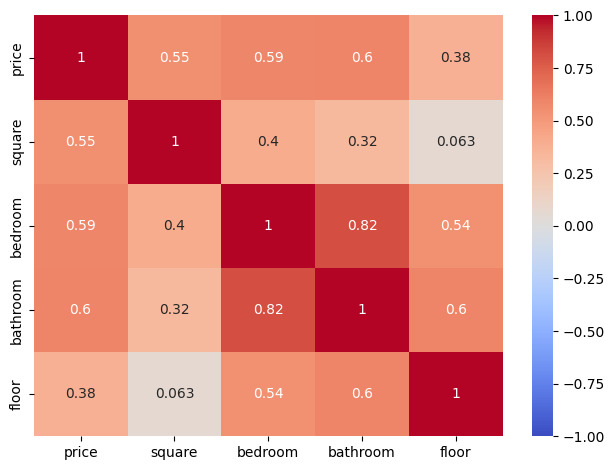

In [ ]:
#Vẽ ma trận tương quan
spearman_correlation_matrix = dataset[['price', 'square', 'bedroom', 'bathroom', 'floor']].corr(method='spearman')
sns.heatmap(spearman_correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.tight_layout()
plt.show()

Có thể thấy khi dùng phương pháp Spearman, độ tương quan giữa các biến đã tăng lên do các điểm ngoại lai đã được xem xét tính vào.

#### **4. Phân tích đặc trưng**

In [ ]:
def plot_numerical(dataset, feature, figsize=(12, 4)):
    fig, axes = plt.subplots(2, 1, figsize=figsize, sharex=True, gridspec_kw={'height_ratios': [1, 3]})
    sns.boxplot(data=dataset, x=feature, ax=axes[0])
    sns.histplot(data=dataset, x=feature, kde=True, ax=axes[1])
    plt.tight_layout()
    plt.show()

def plot_categorical(dataset, feature, figsize=(12, 4), vertical=True):
    temp = dataset[feature].value_counts().reset_index()
    temp.columns = [feature, 'count']

    plt.figure(figsize=figsize)

    if vertical:
        sns.barplot(data=temp, x=feature, y='count')
        plt.xlabel(feature)
        plt.ylabel('Count')
    else:
        sns.barplot(data=temp, x='count', y=feature, orient='h')
        plt.xlabel('Count')
        plt.ylabel(feature)

    plt.xticks(rotation=45 if vertical else 0)
    plt.tight_layout()
    plt.show()

def plot_scatter(dataset, feature, target, xlog=False, ylog=False, figsize=(12, 4)):
    x_scaled = np.log(dataset[feature] + 1) if xlog else dataset[feature]
    y_scaled = np.log(dataset[target] + 1) if ylog else dataset[target]

    plt.figure(figsize=figsize)
    sns.regplot(x=x_scaled, y=y_scaled)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'Mối quan hệ giữa {feature} và {target}')
    plt.tight_layout()
    plt.show()

def plot_bar(dataset, x, y, vertical=True, errorbar=None, figsize=(12, 6)):
    plt.figure(figsize=figsize)

    if vertical:
        sns.barplot(data=dataset, x=x, y=y, ci=errorbar)
        plt.xlabel(x)
        plt.ylabel(y)
    else:
        sns.barplot(data=dataset, x=y, y=x, ci=errorbar, orient='h')
        plt.xlabel(y)
        plt.ylabel(x)

    plt.xticks(rotation=45 if vertical else 0)
    plt.tight_layout()
    plt.show()


**4.1 Giá nhà**

In [ ]:
dataset['price'].describe()

count    7908.000000
mean        8.685787
std        19.989627
min         0.360000
25%         4.000000
50%         5.550000
75%         8.365000
max       840.000000
Name: price, dtype: float64

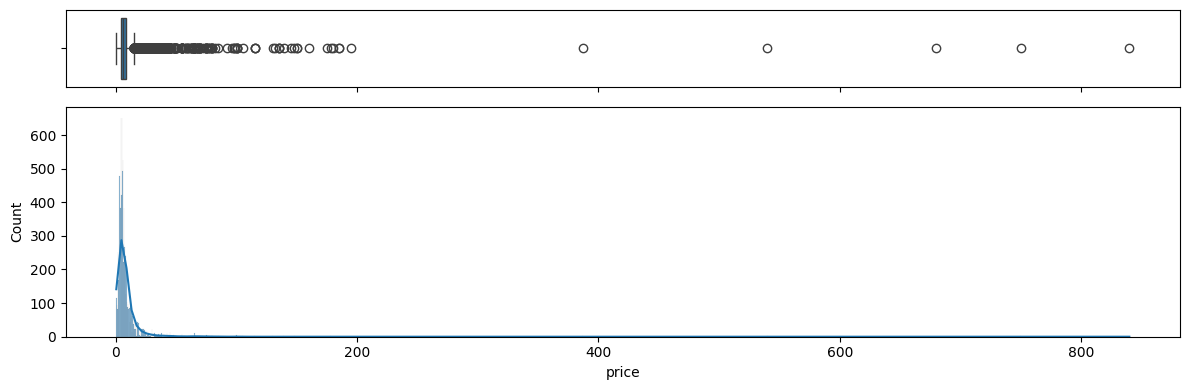

In [ ]:
plot_numerical(dataset, 'price')

**1. Boxplot**
- Ngoại lai (Outliers): Có rất nhiều điểm ngoại lai với giá trị rất cao (trên 100). Những điểm này cần được kiểm tra kỹ lưỡng để xác định xem chúng có hợp lý hay không. Đây có thể là nhà đặc biệt đắt tiền hoặc có thể là lỗi nhập liệu.
- Phân bố chính: Hầu hết các giá trị của biến price nằm trong khoảng từ 0 đến khoảng 100, cho thấy phần lớn các ngôi nhà có giá trị thấp hơn 100.

**2. Histogram**
- Phân bố lệch phải: Phân bố của biến price rõ ràng là lệch phải, với phần lớn các giá trị tập trung ở phía dưới. Điều này cho thấy có nhiều ngôi nhà giá rẻ hơn so với các ngôi nhà giá cao.
- Giá trị phổ biến: Phần lớn các ngôi nhà có giá dưới 20, với một lượng nhỏ ngôi nhà có giá trị cao hơn.

**=> Đề xuất: biến đổi logarit để xử lý sự lệch phải của dữ liệu, có thể áp dụng biến đổi logarit lên biến price. Điều này có thể giúp biểu đồ phân phối trở nên chuẩn hơn và dễ quan sát hơn**

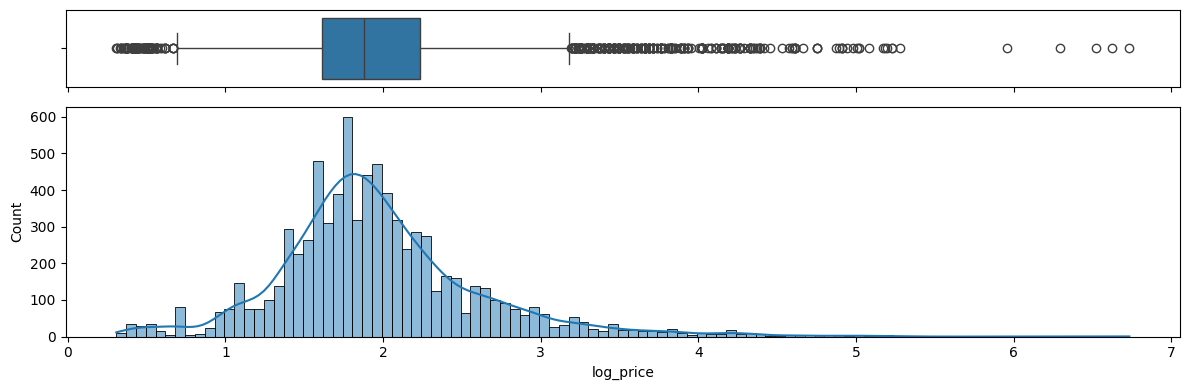

In [ ]:
# Áp dụng biến đổi logarit lên biến price
dataset['log_price'] = np.log1p(dataset['price'])
plot_numerical(dataset, 'log_price')
dataset = dataset.drop('log_price', axis=1)

**4.2 Quận**

In [ ]:
dataset['district'].describe()

count       7908
unique        23
top       Gò Vấp
freq        1080
Name: district, dtype: object

In [ ]:
dataset['district'].unique()

array(['Nhà Bè', 'Tân Bình', 'Phú Nhuận', 'Thủ Đức', 'Bình Thạnh',
       'Quận 4', 'Quận 8', 'Quận 7', 'Tân Phú', 'Gò Vấp', 'Quận 2',
       'Bình Tân', 'Quận 9', 'Quận 6', 'Quận 12', 'Quận 3', 'Hóc Môn',
       'Củ Chi', 'Quận 1', 'Quận 10', 'Quận 11', 'Quận 5', 'Bình Chánh'],
      dtype=object)

Có thể thấy trong 24 quận huyện của Thành phố Hồ Chí Minh, chỉ có huyện Cần Giờ là không có xuất hiện.

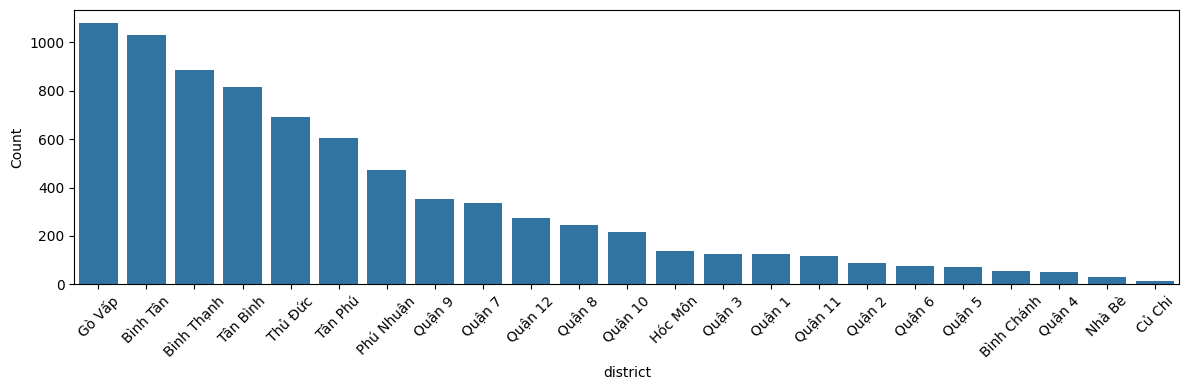

In [ ]:
plot_categorical(dataset, 'district')

**1. Quận có số lượng nhà nhiều nhất:**

- Gò Vấp và Bình Tân: Đây là hai quận có số lượng nhà nhiều nhất, cả hai đều có hơn 1000 nhà. Điều này có thể do mật độ dân cư cao hoặc sự phát triển mạnh mẽ của thị trường bất động sản ở những quận này.

**2. Quận có số lượng nhà ít nhất:**
- Củ Chi và Nhà Bè: Đây là hai quận có số lượng nhà ít nhất. Điều này có thể do các quận này nằm ở khu vực ngoại ô hoặc ít được phát triển về mặt đô thị.

**3. Các quận trung bình:**
- Bình Thạnh, Tân Bình, Thủ Đức: Những quận này có số lượng nhà trung bình từ khoảng 600 đến 800 căn. Đây có thể là các khu vực đang phát triển với sự tăng trưởng ổn định của thị trường nhà.

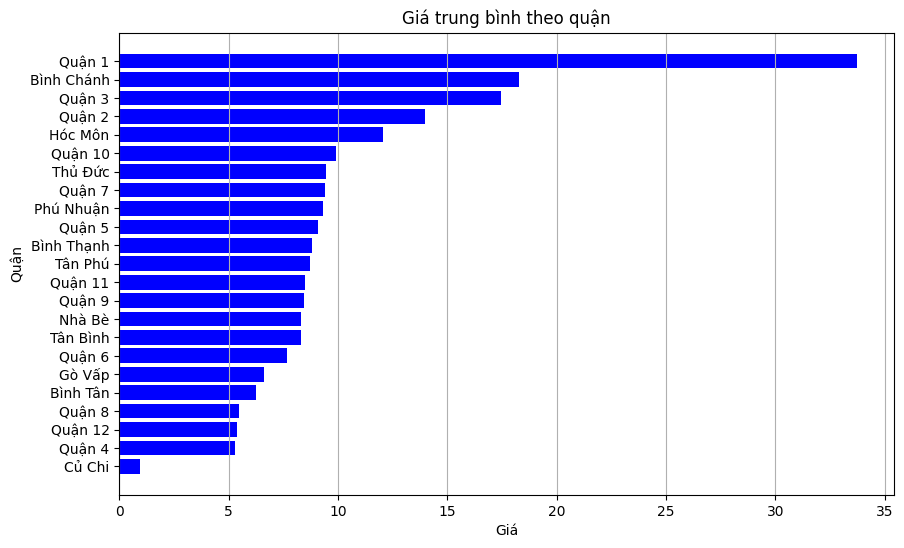

In [ ]:
average_price_by_district = dataset.groupby('district')['price'].mean().reset_index()
average_price_by_district = average_price_by_district.sort_values(by='price')

plt.figure(figsize=(10, 6))
plt.barh(average_price_by_district['district'], average_price_by_district['price'], color='blue')
plt.xlabel('Giá')
plt.ylabel('Quận')
plt.title('Giá trung bình theo quận')
plt.grid(axis='x')
plt.show()

**1. Quận có giá trung bình cao nhất:**
- Quận 1 có giá trung bình cao nhất, vượt trội so với các quận khác. Điều này không quá ngạc nhiên vì Quận 1 là trung tâm hành chính, thương mại và giải trí của thành phố, thu hút nhiều doanh nghiệp, du khách và người dân muốn sống ở khu vực này.

**2. Quận có giá trung bình cao thứ hai và ba:**
- Quận 3 và Quận 2 có giá trung bình cao thứ hai và ba. Quận 3 là khu vực lân cận Quận 1, cũng có nhiều tiện ích, dịch vụ và hạ tầng tốt. Quận 2, đặc biệt là khu vực Thảo Điền và các dự án mới ở khu vực Thủ Thiêm, đang phát triển mạnh và thu hút nhiều nhà đầu tư và người mua nhà.

**3. Các quận có giá trung bình trung bình:**
- Các quận như Quận 5, Quận 10, Quận 7, Thủ Đức, Phú Nhuận, và Bình Thạnh có giá trung bình ở mức trung bình. Đây đều là những quận có hạ tầng tốt, tiện ích đầy đủ và kết nối giao thông thuận lợi.

**4. Quận có giá trung bình thấp nhất:**
- Củ Chi, Bình Chánh, và Hóc Môn có giá trung bình thấp nhất. Những quận này thường nằm ở ngoại thành, xa trung tâm, hạ tầng và tiện ích chưa phát triển đầy đủ, vì vậy nhà ở đây thấp hơn so với các quận trung tâm.

**4.3 Diện tích**

In [ ]:
dataset['square'].describe()

count    7754.000000
mean       75.940366
std       107.830714
min         1.518000
25%        44.000000
50%        60.000000
75%        80.000000
max      6000.000000
Name: square, dtype: float64

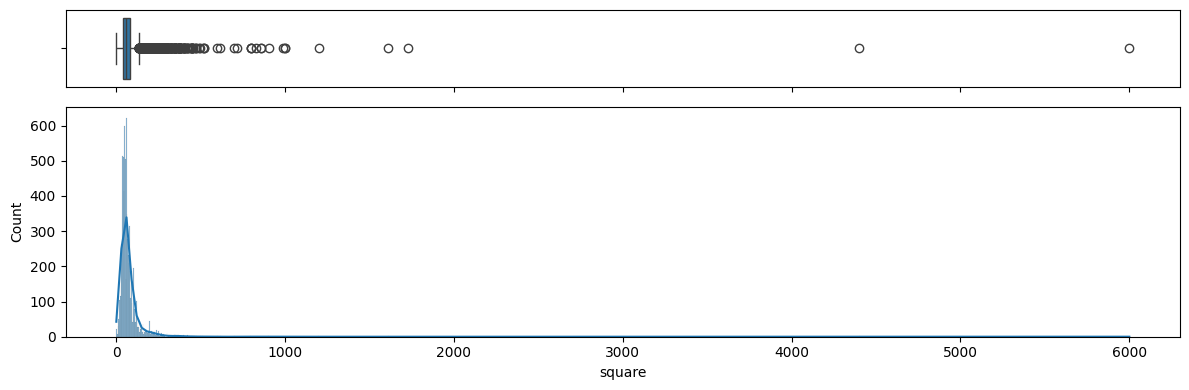

In [ ]:
plot_numerical(dataset, 'square')

**1. Boxplot**
- Ngoại lai (Outliers): Có nhiều giá trị ngoại lai với diện tích rất lớn, vượt qua 1000 và lên đến khoảng 6000. Những điểm này cần được kiểm tra kỹ lưỡng để xác định liệu chúng có hợp lý hay không. Đây có thể là những nhà hoặc biệt thự có diện tích rất lớn hoặc lỗi nhập liệu.
- Phân bố chính: Hầu hết các giá trị của diện tích nằm trong khoảng từ 0 đến khoảng 200, với phần lớn nhà có diện tích nhỏ hơn 100.

**2. Histogram (Biểu đồ phân phối):**
- Phân bố lệch phải: Phân bố của diện tích rõ ràng là lệch phải, với phần lớn các giá trị tập trung ở phía dưới. Điều này cho thấy có nhiều nhà diện tích nhỏ hơn so với các nhà diện tích lớn.
- Giá trị phổ biến: Phần lớn các nhà có diện tích dưới 100, với một lượng nhỏ nhà có diện tích rất lớn.

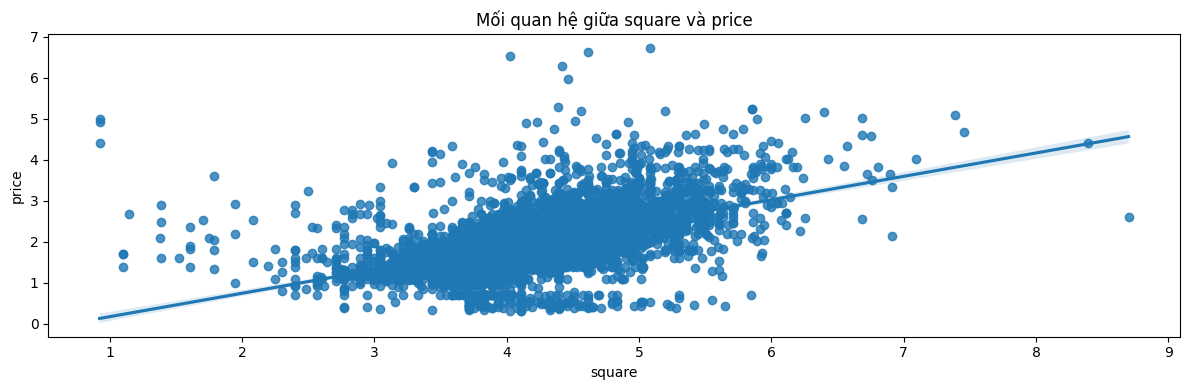

In [ ]:


plot_scatter(dataset, 'square', 'price', xlog=True, ylog=True)

**1. Xu hướng tích cực:**
- Biểu đồ cho thấy có một xu hướng tích cực giữa diện tích (square) và giá (price). Điều này có nghĩa là khi diện tích tăng, giá cũng có xu hướng tăng theo. Điều này là hợp lý vì diện tích lớn hơn thường có giá trị cao hơn.

**2. Sự phân tán:**
- Mặc dù có xu hướng tích cực, nhưng sự phân tán của các điểm dữ liệu khá lớn, đặc biệt ở các giá trị diện tích và giá thấp. Điều này cho thấy có nhiều yếu tố khác ảnh hưởng đến giá ngoài diện tích.

**3. Ngoại lai:**
- Có một số điểm dữ liệu ngoại lai, với diện tích lớn nhưng giá không cao tương ứng, và ngược lại. Những điểm này cần được kiểm tra kỹ lưỡng để xác định nguyên nhân, có thể do đặc điểm đặc biệt của nhà hoặc lỗi nhập liệu.

**4. Độ dốc của đường xu hướng:**
- Đường xu hướng cho thấy mối quan hệ tuyến tính tích cực giữa diện tích và giá. Độ dốc của đường xu hướng không quá cao, cho thấy mối quan hệ này không phải là rất mạnh, nhưng vẫn có ý nghĩa.



**4.4 Số phòng ngủ**

In [ ]:
dataset['bedroom'].describe()

count    5982.000000
mean        3.553828
std         3.100991
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max       111.000000
Name: bedroom, dtype: float64

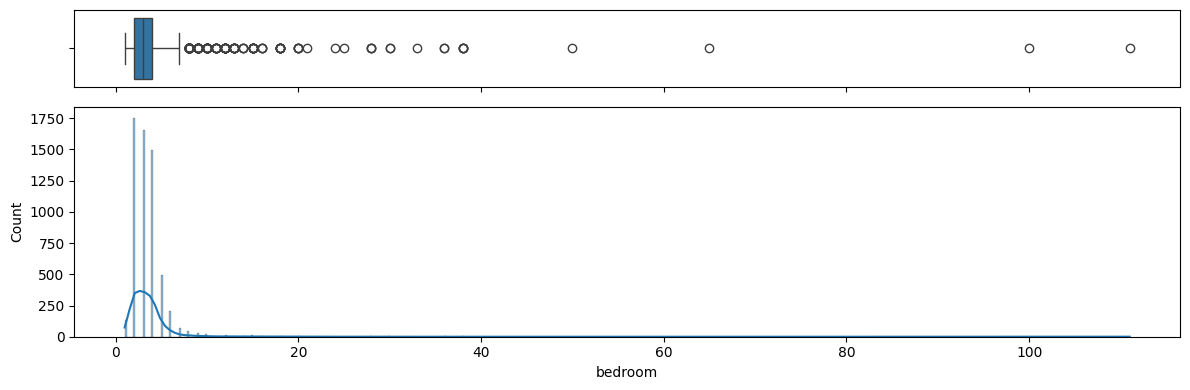

In [ ]:
plot_numerical(dataset, 'bedroom')

**1. Boxplot**
- Ngoại lai (Outliers): Có nhiều giá trị ngoại lai với số phòng ngủ rất lớn, lên đến khoảng 100 phòng. Những điểm này cần được kiểm tra kỹ lưỡng để xác định liệu chúng có hợp lý hay không. Đây có thể là các  căn nhà hoặc biệt thự có diện tích rất lớn hoặc có thể là lỗi nhập liệu.
- Phân bố chính: Hầu hết các giá trị của số phòng ngủ nằm trong khoảng từ 0 đến khoảng 10, với phần lớn các  căn nhà có từ 1 đến 3 phòng ngủ.

**2. Histogram**
- Phân bố lệch phải: Phân bố của số phòng ngủ rõ ràng là lệch phải, với phần lớn các giá trị tập trung ở phía dưới. Điều này cho thấy có nhiều căn nhà có số phòng ngủ ít hơn.
- Giá trị phổ biến: Phần lớn các căn nhà có từ 1 đến 3 phòng ngủ, với một lượng nhỏ căn nhà có số phòng ngủ rất lớn.

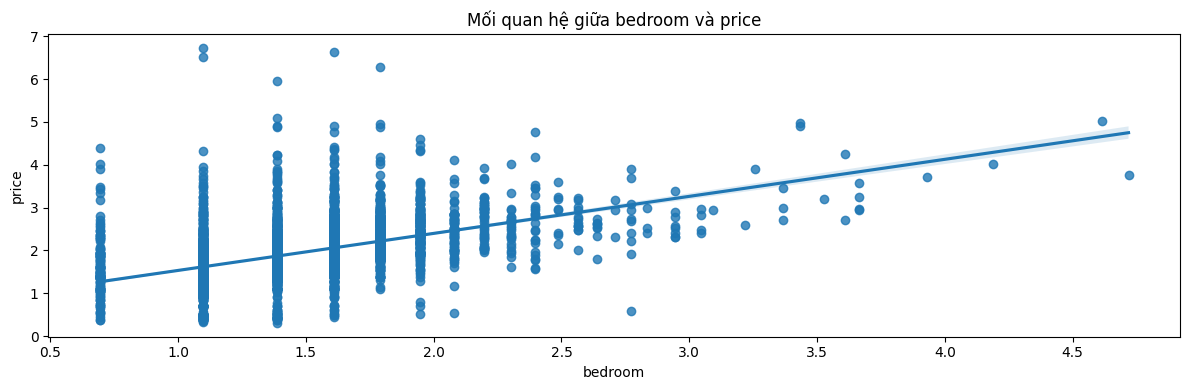

In [ ]:
plot_scatter(dataset, 'bedroom', 'price', xlog=True, ylog=True)

**1. Xu hướng tích cực:**
- Biểu đồ cho thấy có một xu hướng tích cực giữa số phòng ngủ (bedroom) và giá (price). Điều này có nghĩa là khi số phòng ngủ tăng, giá cũng có xu hướng tăng theo. Đây là điều hợp lý vì nhà có nhiều phòng ngủ thường có diện tích lớn hơn và giá trị cao hơn.

**2. Sự phân tán:**
- Sự phân tán của các điểm dữ liệu khá lớn, đặc biệt ở các giá trị số phòng ngủ thấp. Điều này cho thấy có nhiều yếu tố khác ảnh hưởng đến giá ngoài số phòng ngủ.

**3. Ngoại lai:**
- Có một số điểm dữ liệu ngoại lai, với số phòng ngủ lớn nhưng giá không cao tương ứng, và ngược lại. Những điểm này cần được kiểm tra kỹ lưỡng để xác định nguyên nhân, có thể do đặc điểm đặc biệt của nhà hoặc lỗi nhập liệu.

**4. Độ dốc của đường xu hướng:**
- Đường xu hướng cho thấy mối quan hệ tuyến tính tích cực giữa số phòng ngủ và giá. Độ dốc của đường xu hướng không quá cao, cho thấy mối quan hệ này không phải là rất mạnh, nhưng vẫn có ý nghĩa.

**4.5 Số phòng tắm**

In [ ]:
dataset['bathroom'].describe()

count    5701.000000
mean        3.362919
std         3.035929
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max       111.000000
Name: bathroom, dtype: float64

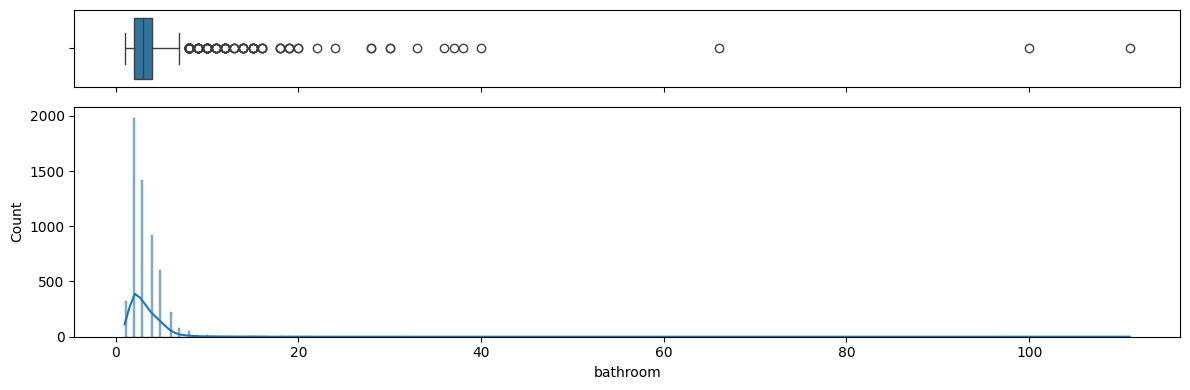

In [ ]:
plot_numerical(dataset, 'bathroom')

**1. Boxplot**
- Ngoại lai (Outliers): Biểu đồ boxplot cho thấy có nhiều điểm ngoại lai với số phòng tắm lớn, lên đến hơn 100 phòng. Đây là một giá trị cực kỳ bất thường và cần được kiểm tra cẩn thận. Các giá trị này có thể xuất hiện do lỗi nhập liệu hoặc các đặc tính đặc biệt của nhà.

- Phân bố chính: Hầu hết các ngôi nhà có số phòng tắm nằm trong khoảng từ 1 đến 10 phòng. Điểm ngoại laichủ yếu nằm ở phần trên của phạm vi, cho thấy sự khác biệt đáng kể.

**2. Histogram**
- Phân bố lệch phải: Phân bố số phòng tắm rõ ràng là lệch phải. Đa số các nhà có từ 1 đến 3 phòng tắm, với số lượng ngôi nhà có nhiều phòng tắm giảm dần theo số lượng phòng tắm tăng lên. Điều này là hợp lý vì nhu cầu về số lượng phòng tắm thường ít hơn số lượng phòng ngủ.
- Giá trị phổ biến: Giá trị phổ biến nhất nằm ở khoảng 1 đến 3 phòng tắm. Số lượng nhà có hơn 3 phòng tắm rất ít, phản ánh đúng xu hướng thực tế của thị trường nhà ở.

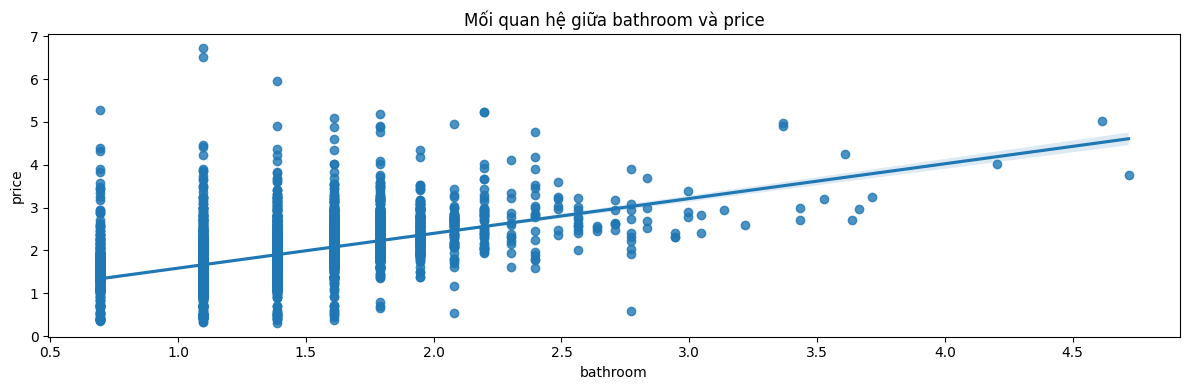

In [ ]:
plot_scatter(dataset, 'bathroom', 'price', xlog=True, ylog=True)

**1. Xu hướng tích cực:**
- Biểu đồ phân tán cho thấy một xu hướng tích cực giữa số phòng tắm và giá. Điều này có nghĩa là khi số phòng tắm tăng, giá của nhà cũng có xu hướng tăng. Đây là một hiện tượng hợp lý vì các nhà có nhiều phòng tắm thường có diện tích lớn hơn và cung cấp nhiều tiện nghi hơn, dẫn đến giá trị cao hơn.

**2. Sự phân tán:**
- Mặc dù có một xu hướng tích cực, sự phân tán của các điểm dữ liệu khá lớn. Ở các mức số phòng tắm thấp (từ 1 đến 3), có nhiều giá trị giá khác nhau, từ thấp đến cao. Điều này cho thấy rằng ngoài số phòng tắm, còn nhiều yếu tố khác ảnh hưởng đến giá của nhà, chẳng hạn như vị trí, diện tích tổng thể, và tiện ích bổ sung.

**3. Ngoại lai:**
- Có một số điểm dữ liệu ngoại lai rõ ràng, đặc biệt là các nhà có giá trị rất cao với số phòng tắm trung bình (khoảng 1 đến 2 phòng tắm). Những điểm này cần được kiểm tra để xác định nguyên nhân. Có thể đây là những ngôi nhà có vị trí đắc địa hoặc được trang bị các tiện ích cao cấp.

**4. Độ dốc của đường xu hướng:**
- Đường xu hướng cho thấy một mối quan hệ tuyến tính tích cực giữa số phòng tắm và giá. Độ dốc của đường xu hướng không quá cao, điều này có nghĩa rằng số phòng tắm có ảnh hưởng đến giá, nhưng không phải là yếu tố quyết định chính.

**4.6 Có ban công hay không**

In [ ]:
dataset['has_balcony'].describe()

count      7908
unique        2
top       False
freq       6581
Name: has_balcony, dtype: object

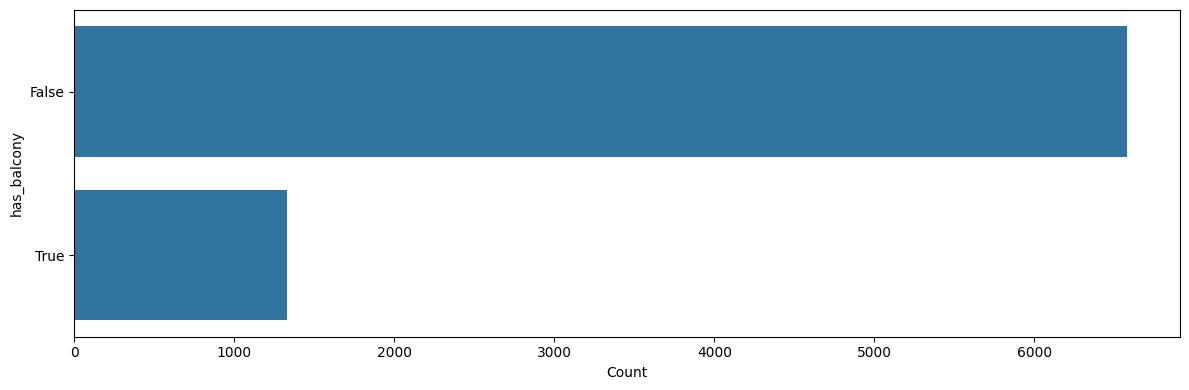

In [ ]:
plot_categorical(dataset, 'has_balcony', vertical=False)

**1. Phân bố tần suất:**
- Biểu đồ tần suất cho thấy số lượng nhà không có ban công (False) chiếm ưu thế với hơn 7000 ngôi nhà. Trong khi đó, số lượng nhà có ban công (True) ít hơn đáng kể, với khoảng 2000 ngôi nhà.

**2. Tỷ lệ nhà có và không có ban công:**
- Tỷ lệ nhà không có ban công cao hơn nhiều so với nhà có ban công. Điều này có thể do thông tin chưa được cập nhật đầy đủ.

<ipython-input-212-17329edd912b>:47: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset, x=y, y=x, ci=errorbar, orient='h')


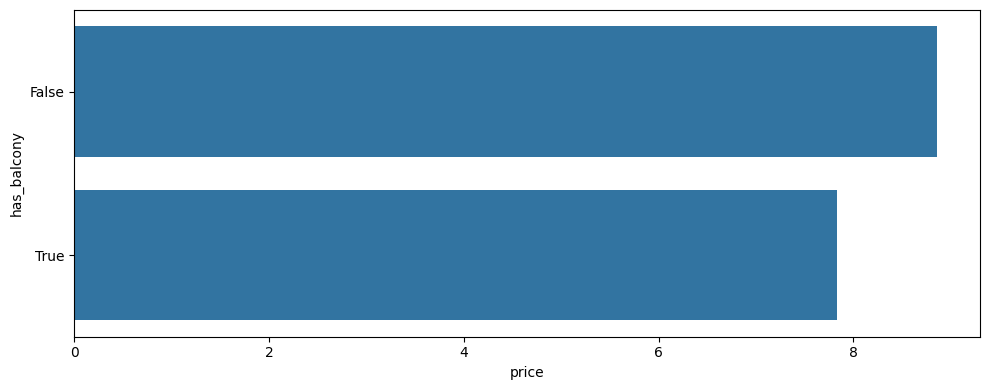

In [ ]:
plot_bar(dataset, 'has_balcony', 'price', vertical=False, errorbar=None, figsize=(10, 4))

**Vì dữ liệu chưa cung cấp đầy đủ thông tin về có ban công hay không, nên có thể gây sai lệch đầu ra mong muốn**

**4.7 Có nội thất hay không**

In [ ]:
dataset['has_furniture'].describe()

count      7908
unique        2
top       False
freq       6605
Name: has_furniture, dtype: object

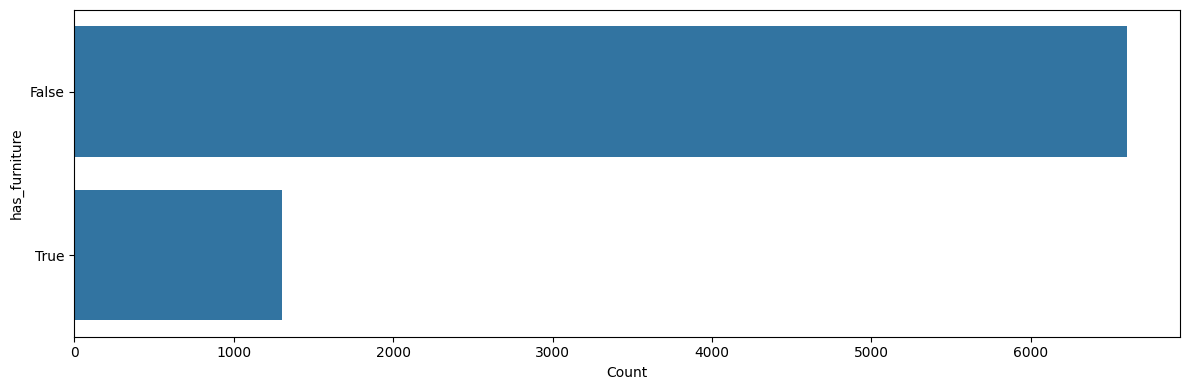

In [ ]:
plot_categorical(dataset, 'has_furniture', vertical=False)

**1. Phân bố tần suất:**
- Biểu đồ tần suất cho thấy số lượng nhà không có nội thất (False) chiếm ưu thế với hơn 7000 ngôi nhà. Trong khi đó, số lượng nhà có nội thất (True) ít hơn đáng kể, với khoảng 2000 ngôi nhà.

**2. Tỷ lệ nhà có và không có nội thất:**
- Tỷ lệ nhà không có nội thất cao hơn nhiều so với nhà có nội thất.

<ipython-input-212-17329edd912b>:47: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset, x=y, y=x, ci=errorbar, orient='h')


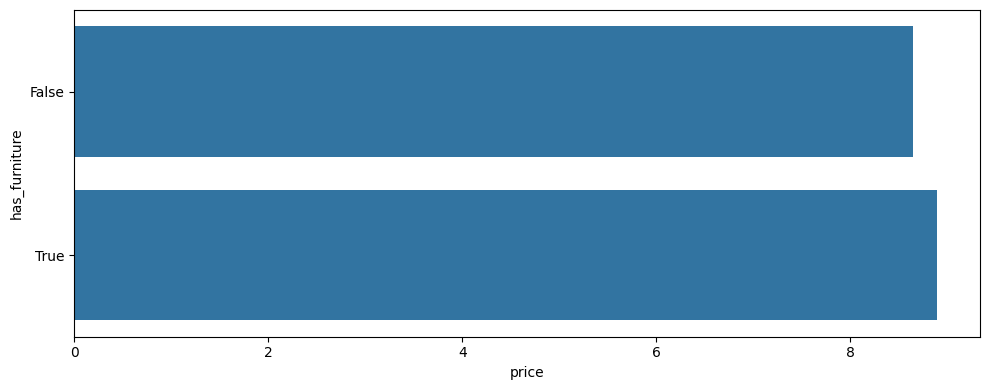

In [ ]:
plot_bar(dataset, 'has_furniture', 'price', vertical=False, errorbar=None, figsize=(10, 4))

**1. Sự chênh lệch giá:**
- Nhìn vào biểu đồ, có sự chênh lệch rõ ràng giữa hai nhóm. Mức giá trung bình của nhóm có nội thất cao hơn nhóm không có nội thất hoặc không cung cấp thông tin. Điều này có thể phản ánh rằng các căn nhà có nội thất thường có giá cao hơn là không có nội thất.

**2. Nhận xét cả 2 biểu đồ:**
- Ta có thể thấy với biểu đồ phân bố, số lượng nhà có nội thất ít hơn nhiều so với nhà không có nội thất hoặc không có thông tin. Nhưng ở biểu đồ này, mức giá của nhà có nội thất lại cao hơn nhà không có nội thất. Điều đó chứng minh rằng, nhà có nội thất hay không cũng ảnh hưởng tích cực đến giá nhà. Cụ thể, nhà có nội thất thường có mức giá cao hơn hẳn so với nhà không có nội thất.



**4.8 Có thông tin pháp lý hay không**

In [ ]:
dataset['has_legal_info'].describe()

count     7908
unique       2
top       True
freq      5538
Name: has_legal_info, dtype: object

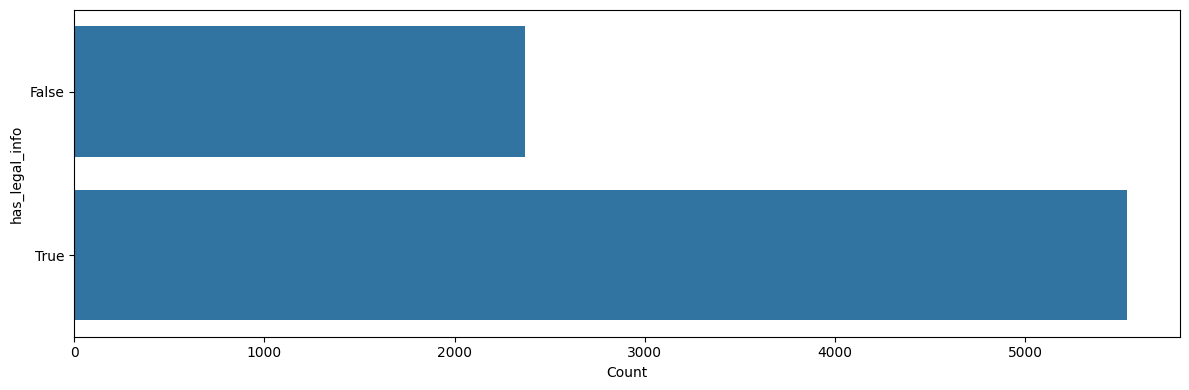

In [ ]:
plot_categorical(dataset, 'has_legal_info', vertical=False)

**1. Phân bố tần suất:**
- Biểu đồ tần suất cho thấy số nhà ở có thông tin pháp lý (True) chiếm ưu thế với khoảng 6000 ngôi nhà. Trong khi đó, số lượng nhà không có thông tin pháp lý hoặc không cung cấp thông tin (False) ít hơn, với khoảng 3000 ngôi nhà.

**2. Tỷ lệ nhà có và không có thông tin pháp lý:**
- Tỷ lệ nhà có thông tin pháp lý cao hơn nhiều so với nhà không có thông tin pháp lý. Điều này có thể phản ánh tầm quan trọng của thông tin pháp lý trong việc mua bán nhà và sự ưu tiên của người mua đối với các ngôi nhà có đầy đủ giấy tờ pháp lý.

<ipython-input-212-17329edd912b>:47: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset, x=y, y=x, ci=errorbar, orient='h')


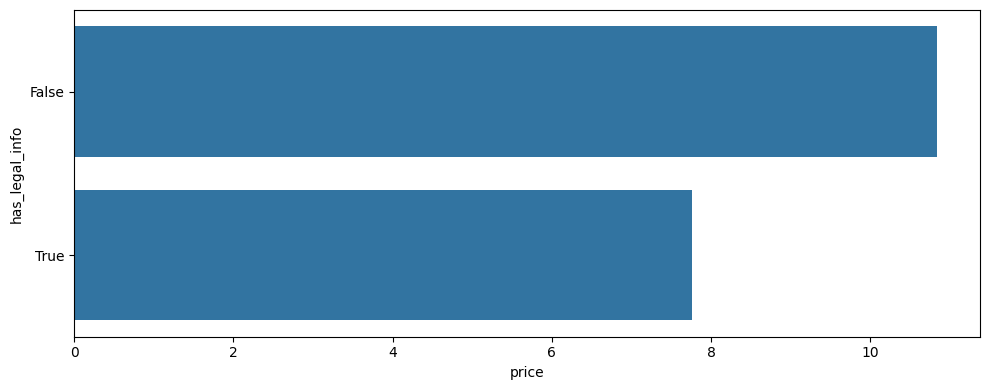

In [ ]:
plot_bar(dataset, 'has_legal_info', 'price', vertical=False, errorbar=None, figsize=(10, 4))

**1. Phân bố giá theo yếu tố thông tin pháp lý:**
- Mức giá trung bình của nhà ở không có thông tin pháp lý hoặc không cung cấp thông tin (False) dường như cao hơn so với nhà có thông tin pháp lý (True).

**2. Sự chênh lệch giá:**
- Nhìn vào biểu đồ, có sự chênh lệch rõ ràng giữa hai nhóm. Mức giá trung bình của nhóm không có thông tin pháp lý hoặc không cung cấp thông tin cao hơn nhóm có thông tin pháp lý. Điều này có thể phản ánh rằng các ngôi nhà không có thông tin pháp lý hoặc không cung cấp thông tin có thể nằm ở những vị trí đắc địa hoặc có các đặc điểm khác làm tăng giá trị của chúng, bất chấp sự thiếu hụt về mặt pháp lý.

=> Có vẻ do dữ liệu đầu vào không được đầy đủ thông tin nên ảnh hưởng đến mối liên hệ giữa có thông tin pháp lý hay không lên giá nhà -> **điều này có thể dẫn đến mô hình có thể dự đoán sai, gây tiêu cực đến hiệu suất của mô hình -> cân nhắc không đưa feature này vào mô hình**

**4.9 Có tầng hầm hay không**

In [ ]:
dataset['has_basement'].describe()

count      7908
unique        2
top       False
freq       7756
Name: has_basement, dtype: object

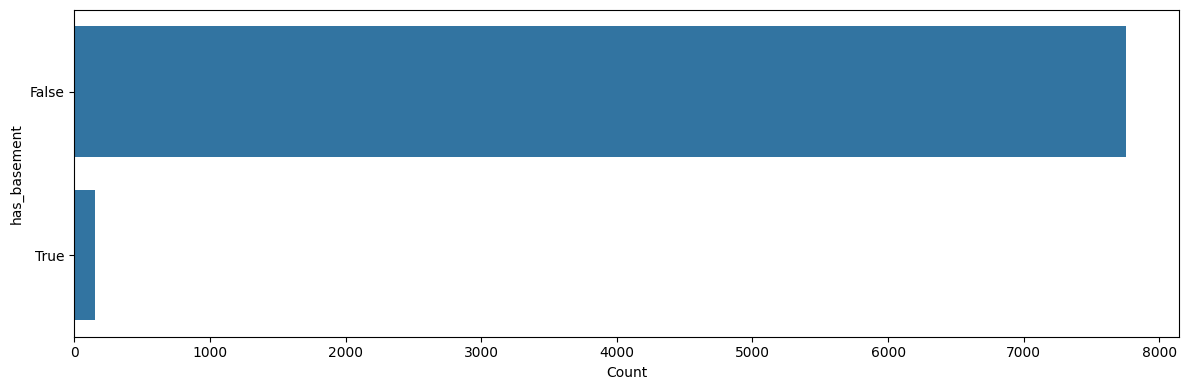

In [ ]:
plot_categorical(dataset, 'has_basement', vertical=False)

**1. Phân bố tần suất:**
- Biểu đồ tần suất cho thấy số lượng nhà không có tầng hầm (False) chiếm ưu thế tuyệt đối với hơn 8000 ngôi nhà. Trong khi đó, số lượng nhà có tầng hầm (True) rất ít, chỉ khoảng 500 ngôi nhà.

**2. Tỷ lệ nhà có và không có tầng hầm:**
- Tỷ lệ nhà không có tầng hầm cao hơn nhiều so với nhà có tầng hầm.

<ipython-input-212-17329edd912b>:47: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset, x=y, y=x, ci=errorbar, orient='h')


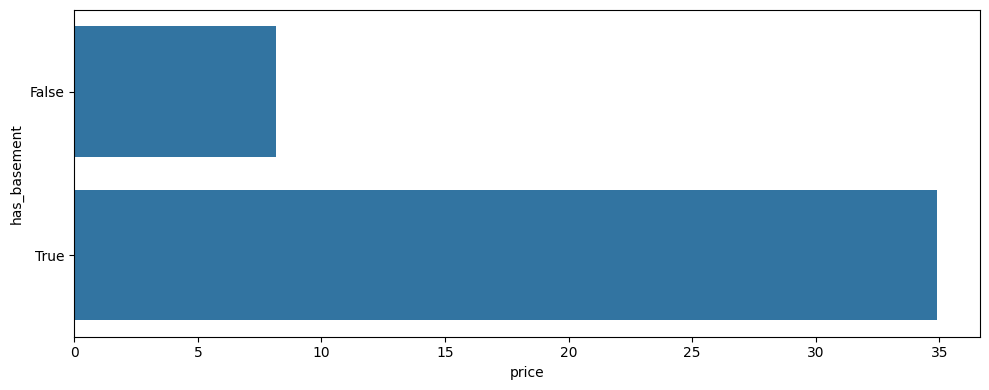

In [ ]:
plot_bar(dataset, 'has_basement', 'price', vertical=False, errorbar=None, figsize=(10, 4))

**1. Phân bố giá theo yếu tố tầng hầm:**
- Mức giá trung bình của nhà có tầng hầm (True) dường như cao hơn rất nhiều so với nhà không có tầng hầm (False).

**2. Sự chênh lệch giá:**
- Nhìn vào biểu đồ, có sự chênh lệch rõ ràng giữa hai nhóm. Mức giá trung bình của nhóm có tầng hầm cao hơn nhóm không có tầng hầm. Điều này có thể phản ánh rằng các ngôi nhà có tầng hầm thường có giá trị cao hơn do diện tích sử dụng lớn hơn và các tiện ích bổ sung mà tầng hầm mang lại.

**3. Nhận xét:**
- Ở biểu đồ phân bố ta thấy số lượng nhà có tầng hầm ít hơn rất nhiều so với nhà không có tầng hầm, nhưng ở biểu đồ này, giá của nhà có tầng hầm lại cao vượt trội hơn so với nhà không có tầng hầm. Điều đó có nghĩa nhà có tầng hầm có xu hướng tích cực với giá nhà. Cụ thể, nhà có tầng hầm thường có giá cao hơn nhiều so với nhà không có tầng hầm.
- Tuy nhiên, thường các nhóm nhà có tầng hầm là buiding, điều này có thể ảnh hưởng ít nhiều đến việc dự đoán giá nhà ở nếu không được xem xét kĩ lưỡng.

**4.10 Số tầng**

In [ ]:
dataset['floor'].describe()

count    7908.000000
mean        3.039833
std         2.059150
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        81.000000
Name: floor, dtype: float64

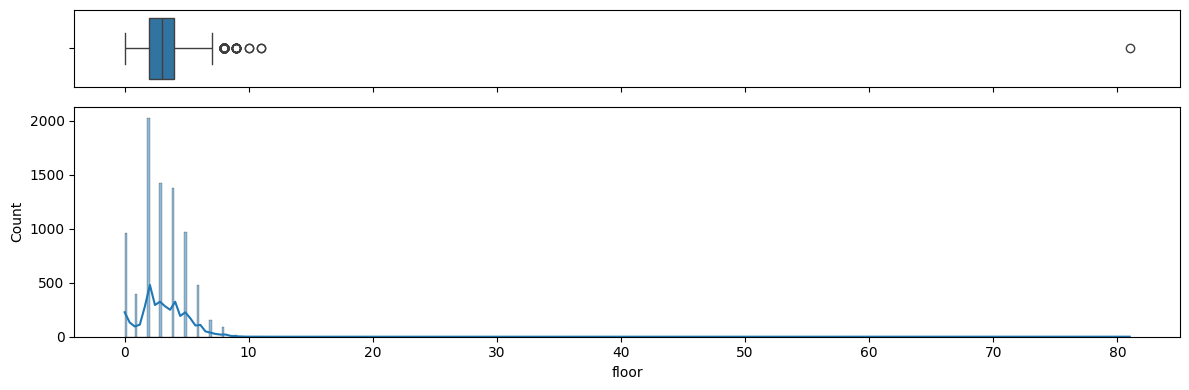

In [ ]:
plot_numerical(dataset, 'floor')

**1. Boxplot**
- Ngoại lai (Outliers): Biểu đồ hộp cho thấy có nhiều điểm ngoại lai với số tầng rất lớn, lên đến hơn 80 tầng. Những giá trị này cần được kiểm tra kỹ lưỡng để xác định tính hợp lý của chúng. Đây có thể là các tòa nhà cao tầng đặc biệt, nhưng cũng có thể do lỗi nhập liệu.
- Phân bố chính: Hầu hết các giá trị của số tầng nằm trong khoảng từ 0 đến 10 tầng, với phần lớn các ngôi nhà nằm dưới 5 tầng.

**2. Histogram**
- Phân bố lệch phải: Phân bố của số tầng rõ ràng là lệch phải, với phần lớn các giá trị tập trung ở phía dưới. Điều này phản ánh thực tế rằng phần lớn các căn nhà trong dữ liệu có số tầng ít, và số lượng tòa nhà cao tầng là rất ít.
- Giá trị phổ biến: Phần lớn các ngôi nhà có số tầng từ 0 đến 5 tầng, với một lượng nhỏ ngôi nhà có số tầng rất lớn.

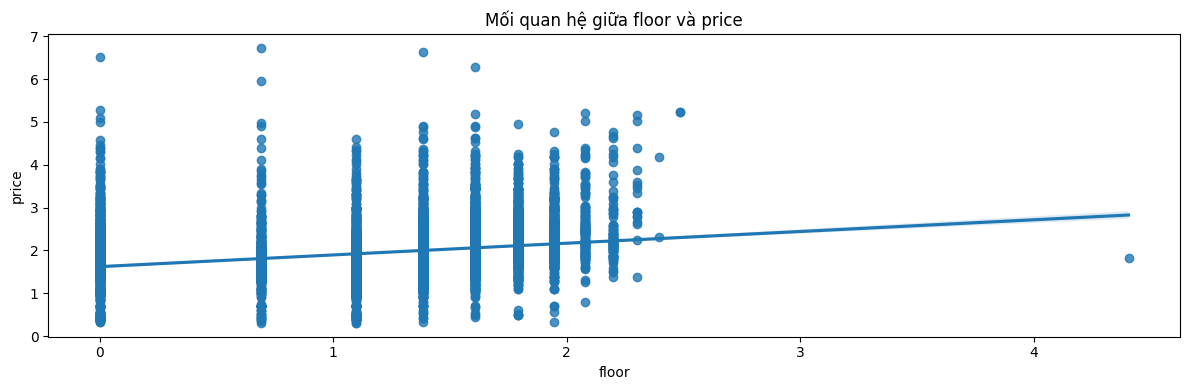

In [ ]:
plot_scatter(dataset, 'floor', 'price', xlog=True, ylog=True)

**1. Xu hướng tích cực:**
- Biểu đồ phân tán cho thấy một xu hướng tuyến tính nhẹ giữa số tầng và giá nhà. Đường xu hướng có độ dốc nhỏ nhưng dương, cho thấy rằng khi số tầng tăng, giá nhà cũng có xu hướng tăng nhẹ.

**2. Sự phân tán của dữ liệu:**
- Sự phân tán của các điểm dữ liệu khá lớn, đặc biệt ở các giá trị số tầng thấp (từ 0 đến 1). Điều này cho thấy có nhiều yếu tố khác ngoài số tầng ảnh hưởng đến giá nhà.

**3. Ngoại lai (Outliers):**
- Có một số điểm dữ liệu ngoại lai, đặc biệt là nhà có số tầng thấp nhưng giá rất cao. Những điểm này cần được kiểm tra kỹ lưỡng để xác định nguyên nhân, có thể do vị trí đắc địa hoặc các tiện ích cao cấp đặc biệt của ngôi nhà hoặc cũng là lỗi nhập liệu.

**4. Độ dốc của đường xu hướng:**
- Độ dốc của đường xu hướng không quá cao, cho thấy mối quan hệ giữa số tầng và giá không phải là mạnh. Tuy nhiên, vẫn có một xu hướng tích cực, tức là số tầng có thể có ảnh hưởng nhất định đến giá nhà.

**4.11 Bán gấp hay không**

In [ ]:
dataset['is_hurried'].describe()

count      7908
unique        2
top       False
freq       6027
Name: is_hurried, dtype: object

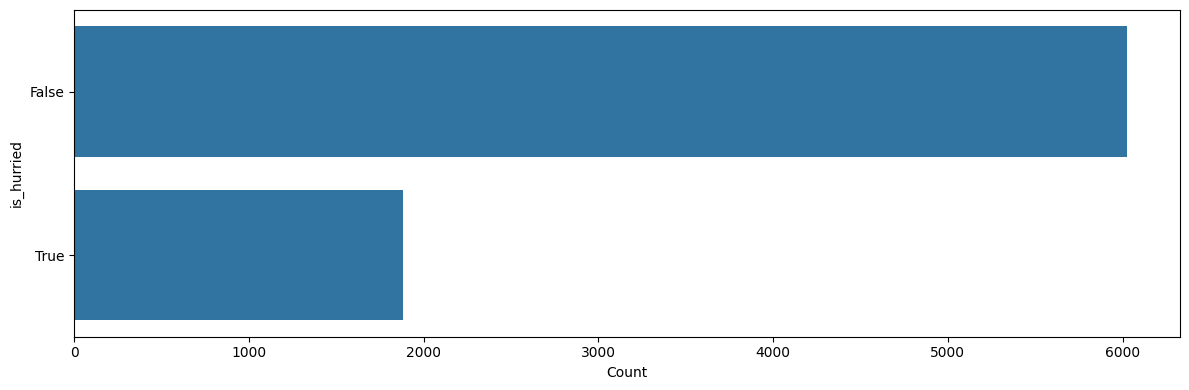

In [ ]:
plot_categorical(dataset, 'is_hurried', vertical=False)

**1. Phân bố tần suất:**
- Biểu đồ tần suất cho thấy số lượng nhà không có nhu cầu bán gấp (False) chiếm ưu thế với hơn 6000 căn. Trong khi đó, số lượng nhà có nhu cầu bán gấp (True) ít hơn đáng kể, với khoảng 2000 căn.

**2. Tỷ lệ nhà có và không có nhu cầu bán gấp:**
- Tỷ lệ nhà không có nhu cầu bán gấp cao hơn nhiều so với nhà có nhu cầu bán gấp.

<ipython-input-212-17329edd912b>:47: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset, x=y, y=x, ci=errorbar, orient='h')


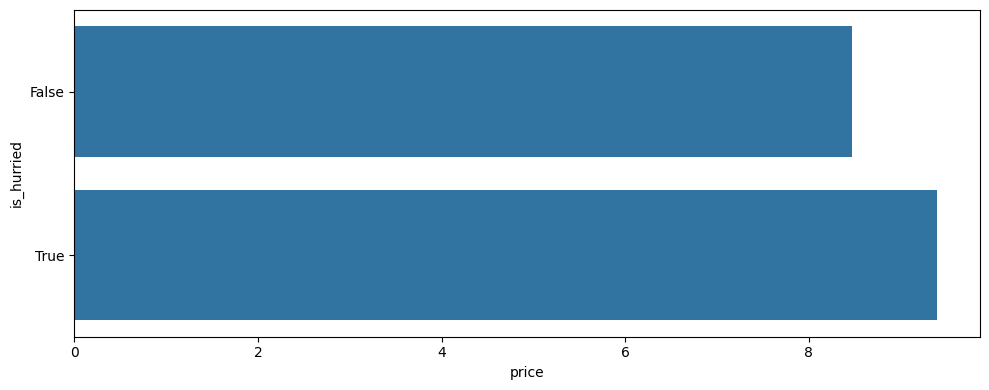

In [ ]:
plot_bar(dataset, 'is_hurried', 'price', vertical=False, errorbar=None, figsize=(10, 4))

**1. Phân bố giá theo yếu tố nhu cầu bán gấp:**
- Mức giá trung bình của nhà có nhu cầu bán gấp (True) dường như cao hơn so với nhà không có nhu cầu bán gấp (False).

**2. Sự chênh lệch giá:**
- Nhìn vào biểu đồ, có sự chênh lệch giữa hai nhóm nhưng không nhiều.

**3. Nhận xét:**
- Ở biểu đồ phân bố, ta có thể thấy số lượng nhà bán gấp ít hơn nhiều so với nhà không bán gấp, nhưng mức giá nhà bán gấp ở biểu đồ này cao hơn nhà không bán gấp, điều này chưa thấy rõ mối liên hệ giữa việc bán gấp và giá cả.

**=> cân nhắc không đưa vào mô hình dự đoán.**



**4.12 Loại nhà**

In [ ]:
dataset["house_type"].describe()

count          7908
unique            4
top       nhà riêng
freq           6383
Name: house_type, dtype: object

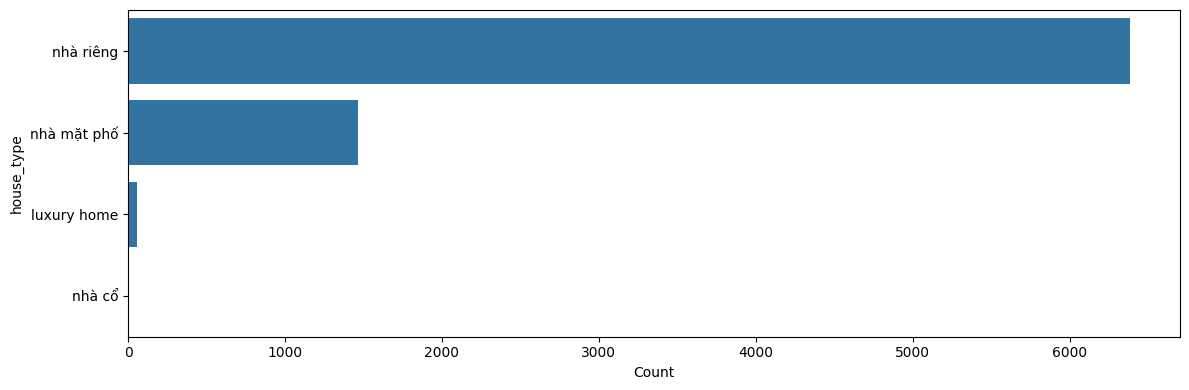

In [ ]:
plot_categorical(dataset, 'house_type', vertical=False)

**1. Phân bố tần suất:**
- Biểu đồ tần suất cho thấy phần lớn các là nhà riêng với số lượng hơn 7000 căn. Tiếp theo là nhà mặt phố với khoảng 2500 ngôi nhà. Số lượng nhà luxury home và nhà cổ rất ít, chỉ chiếm một phần nhỏ trong tổng số.

**2. Tỷ lệ loại hình nhà:**
- Nhà riêng chiếm tỷ lệ cao nhất, cho thấy đây là loại hình nhà phổ biến nhất trong khu vực nghiên cứu. Nhà mặt phố cũng khá phổ biến nhưng ít hơn nhiều so với nhà riêng. Số lượng nhà luxury home và nhà cổ rất ít, có thể phản ánh nhu cầu hoặc nguồn cung thấp đối với các loại hình này.

<ipython-input-212-17329edd912b>:47: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset, x=y, y=x, ci=errorbar, orient='h')


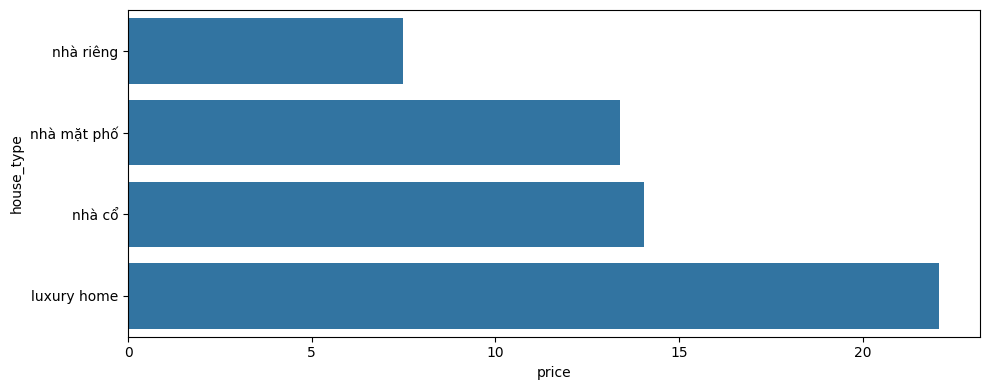

In [ ]:
plot_bar(dataset, 'house_type', 'price', vertical=False, errorbar=None, figsize=(10, 4))

**1. Phân bố giá theo loại hình nhà:**
- Biểu đồ cho thấy sự phân bố giá trị nhà theo bốn loại hình: nhà riêng, nhà mặt phố, nhà cổ, và luxury home. Mức giá trung bình của các loại hình nhà khác nhau khá rõ rệt.

**2. Sự chênh lệch giá:**
- Nhìn vào biểu đồ, có sự chênh lệch lớn giữa các loại hình nhà. Mức giá trung bình của nhà luxury home cao nhất, tiếp theo là nhà cổ và nhà mặt phố, trong khi đó nhà riêng có mức giá trung bình thấp nhất.

**3. Nhận xét:**
- Biểu đồ cho thấy giá nhà có sự khác biệt giữa các loại nhà.
Nhà loại "luxury home" có giá trung bình cao hơn so với các loại nhà khác, với sự phân bố giá khá đồng đều và ít giá trị ngoại lai.
Nhà loại "nhà riêng" và "nhà mặt phố" có sự phân bố giá rộng hơn và nhiều giá trị ngoại lai, cho thấy rằng giá của các loại nhà này có thể thay đổi đáng kể.

**4. 13 Hướng nhà**

In [ ]:
dataset['house_direction'].describe()

count     2580
unique       8
top       đông
freq      1325
Name: house_direction, dtype: object

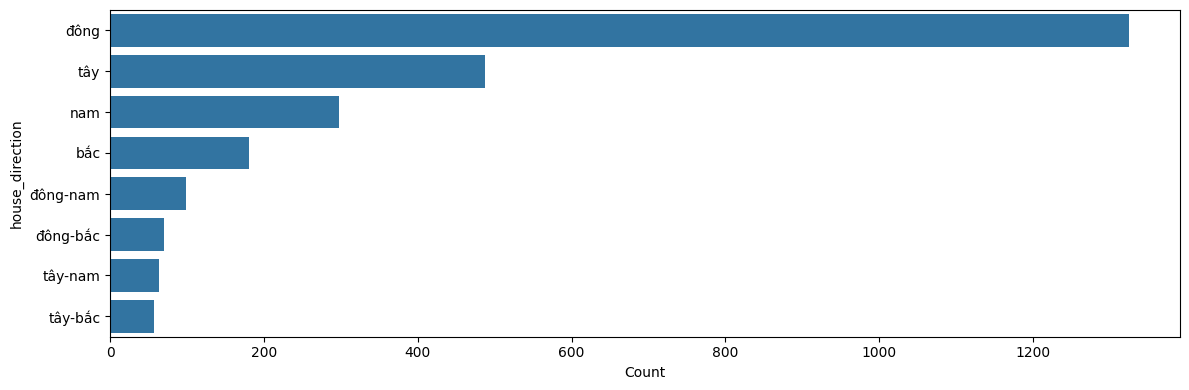

In [ ]:
plot_categorical(dataset, 'house_direction', vertical=False)

**1. Phân bố số lượng theo hướng nhà:**
- Biểu đồ tần suất cho thấy phần lớn nhà trong dữ liệu có hướng đông (khoảng 1400 ngôi nhà). Hướng tây và nam cũng khá phổ biến với số lượng lần lượt khoảng 600 và 400 ngôi nhà.
- Các hướng còn lại như bắc, đông-nam, đông-bắc, tây-nam, và tây-bắc có số lượng ít hơn đáng kể.

**2. Tỷ lệ các hướng nhà:**
- Hướng đông chiếm tỷ lệ cao nhất, cho thấy có thể có sự ưa chuộng đặc biệt đối với hướng này. Điều này có thể do yếu tố phong thủy, ánh sáng tự nhiên, hoặc các điều kiện môi trường khác.
- Hướng tây và nam cũng được ưa chuộng nhưng ít hơn so với hướng đông.
Các hướng khác như bắc, đông-nam, đông-bắc, tây-nam, và tây-bắc có tỷ lệ thấp hơn.

<ipython-input-212-17329edd912b>:47: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset, x=y, y=x, ci=errorbar, orient='h')


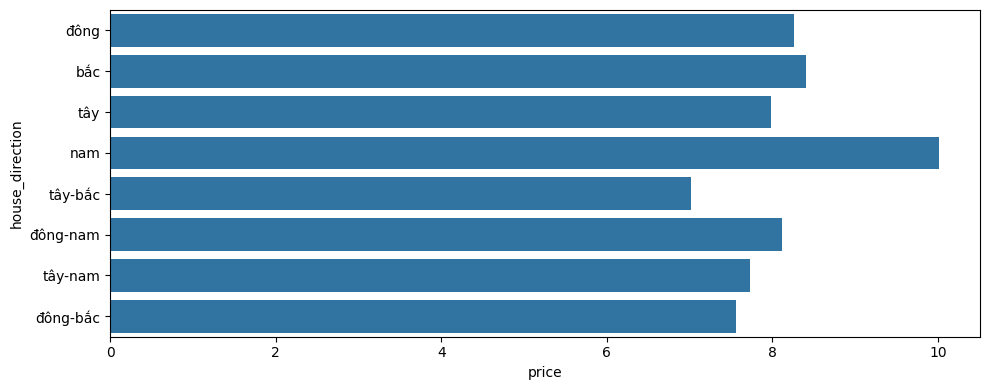

In [ ]:
plot_bar(dataset, 'house_direction', 'price', vertical=False, errorbar=None, figsize=(10, 4))

**1. Phân bố giá theo hướng nhà:**
- Biểu đồ cho thấy sự phân bố giá trị nhà theo các hướng nhà khác nhau: nam, tây-nam, bắc, tây, đông, đông-nam, đông-bắc, và tây-bắc.
- Mức giá trung bình của các nhà hướng nam cao nhất, trong khi các hướng khác có mức giá trung bình thấp hơn và khá đồng đều.

**2. Sự chênh lệch giá giữa các hướng:**
- Hướng nam có mức giá trung bình cao nhất.
- Các hướng khác như tây-nam, bắc, tây, đông, đông-nam, đông-bắc, và tây-bắc có mức giá trung bình thấp hơn nhưng không có sự chênh lệch quá lớn giữa chúng.

**3. Nhận xét:**
- Trên thực tế, tại nhiều dự án, hướng Đông Nam được nhiều gia đình lựa chọn khi mua nhà đất bởi mát về mùa hè và ấm vào mùa đông. Nhưng có thể thấy trong biểu đồ, giá của hướng này khá thấp so với các hướng còn lại. Ngoài ra, hướng nhà còn phụ thuộc nhiều yếu tố khác, và không có mối liên hệ rõ ràng với giá.

**=> Vì vậy, với khoảng hơn 67% giá trị thiếu, ta sẽ xem xét loại bỏ nó để không ảnh hướng tới mô hình dự đoán**

### **IV. Tiền xử lý dữ liệu**

Sau khi đã phân tích các thuộc tính và mục tiêu dự đoán, nhóm tiến hành việc biến đổi dữ liệu về các dạng phù hợp cho mô hình hoạt động.

In [ ]:
import re
from sklearn.neighbors import KNeighborsClassifier
from datetime import datetime

# Tạo bản sao của dataset
df = dataset.copy()

#### **1. Chuyển đổi định dạng cột**

Chuyển đổi ngày giờ về dạng số

Sử dụng RegEx để xuất ra tất cả các số trong cột post_date theo hàng, sau đó gộp lại thành giá trị liên tục với mục đích tạo ra một cột giá trị numeric liên tục để tiện xử lí và xem xét có mối liên hệ nào với giá nhà hay không

giá trị thay thế = năm + số ngày / 365


In [ ]:
def convert_date_to_number(date_str):
    # Chuyển ngày tháng sang dạng yyyy-mm-dd
    def extract_date(time):
        numbers = re.findall(r'\d+', time)

        return "-".join(numbers[:3])
    date = extract_date(date_str)
    date = datetime.strptime(date, "%Y-%m-%d")
    return date.year + date.month / 12 + date.day / 365

df['post_date'] = df['post_date'].apply(convert_date_to_number)

Chuyển đổi kiểu boolean về dạng số

Sau khi cào data và làm sạch dữ liệu, có các cột chỉ mang hai giá trị là True và False và ở dạng text, nên nhóm đã quyết định chuyển về 1 và 0 để tiện xử lí hơn

In [ ]:
bool_col = ['has_basement', 'has_furniture', 'is_hurried', 'has_legal_info', 'has_balcony']
for col_name in bool_col:
    df[col_name]=df[col_name].astype(int)

Sử dụng IQR để loại bỏ giá trị ngoại lai ở `floor`

In [ ]:
# Loại bỏ các outlier trong price và floor bằng IQR
cols = ['floor']

for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


Sau khi khảo sát và visualize thuộc tính `'square'` của dataset thì nhóm nhận thấy có những giá trị `'square'` vô lí, ví dụ như: (1) Có những căn nhà chỉ có 1 2m2; hay (2) có những căn không phải là nhà ở mà là nhà kho có giá trị `'square'` lên tới 2000 3000m2 nhưng lại để thuộc tính `'house_type'` là Nhà riêng, Nhà mặt tiền,...  

+ (1) => Những căn nhà có kích thước nhỏ như thế này thực tế có ở ngoài nhưng vì nó không thực sự mang lại tính khái quát cho bài toán nên nhóm đã quyết định drop

+ (2) => Như đã nói ở trên, nhiệm vụ của nhóm là dự đoán nhà ở nên những loại nhà không phải nhà ở nhóm sẽ quyết định loại bỏ chúng

In [ ]:
# Sau khi tính toán các giá trị chặn trên, chặn dưới thì nhóm đã quyết định dùng
# Phương pháp percentile để loại bỏ các giá trị ngoại lai

df = df.dropna(subset=['square'])

square_lower_threshhold=df['square'].quantile(0.02)
square_upper_threshhold=df['square'].quantile(0.98)
df = df[(df['square'] >= square_lower_threshhold) & (df['square'] <= square_upper_threshhold)]

Đồng thời qua khảo sát, nhóm nhận thấy rằng 'price' có thể bị lẫn những giá trị nhỏ nhưng không phải là giá bán mà chỉ là giá thuê nhà, hay những giá trị quá lớn khi bán kho xưởng hoặc bán đất. Vì vậy những giá trị này là những giá trị ngoại lai

=> Nhóm đề xuất loại bỏ những giá trị này để không ảnh hưởng tới những tính toán, dự đoán của mô hình



In [ ]:
# Loại bỏ luôn các giá trị price để dataset đồng nhất
price_lower_threshhold=df['price'].quantile(0.005)
price_upper_threshhold=df['price'].quantile(0.995)
df = df[(df['price'] >= price_lower_threshhold) & (df['price'] <= price_upper_threshhold)]

#### **3. Số hóa thuộc tính**

In [ ]:
!pip install category_encoders
from category_encoders import MEstimateEncoder

Sử dụng MEstimateEncoder để số hóa dữ liệu. MEstimateEncoder là một phương pháp thông dụng của Target Encoding để giảm thiểu rủi ro overfitting.

MEstimateEncoder sử dụng công thức sau:
$$
\text{M-estimate}(c) = \frac{N_c \cdot \mu_c + m \cdot \mu}{N_c + m}
$$

Với :

*   $N_c$ là tần số của hạng mục
*   $\mu_c$ là trung bình của hạng mục
*   $\mu$ là trung bình toàn cục
*   $m$ là tham số làm mượt (smoothing parameter)

Bằng cách này, có thể làm giảm sự ảnh hưởng của những hạng mục chỉ xuất hiện ít lần đến việc số hóa

Số hóa thuộc tính `house_type`

In [ ]:
# Số hóa thuộc tính 'house_type'
from category_encoders import MEstimateEncoder

X = df['house_type']
y = df['price']
m_value = 1

encoder = MEstimateEncoder(cols=['house_type'], m=m_value)
encoder.fit(X, y)
df['house_type'] = encoder.transform(X)

Tương tự, ta có thể số hóa thuộc tính `district` dùng phương pháp MEstimatorEncoder. Tuy nhiên, trong bộ dữ liệu hiện đang thiếu huyện Cần Giờ, vì vậy nhóm quyết định sẽ tạo map để chuyển đổi.

In [ ]:
# Số hóa thuộc tính 'district'
# Áp dụng M-EstimateEncoder
X = df['district']
y = df['price']
m_value = 1

encoder = MEstimateEncoder(cols=['district'], m=m_value)
encoder.fit(X, y)

transformed= encoder.transform(X)

# Tạo map để chuyển đổi thuộc tính sang dạng số
original_categories = X.unique()
category_mapping = {}

for category in original_categories:
    transformed_value = transformed[X == category].iloc[0, 0]
    category_mapping[category] = {
        'encoded_value': transformed_value
    }
category_mapping['Cần Giờ'] = {
    'encoded_value': 2.2
}

for district in df['district']:
    if district in category_mapping:
        df.loc[df['district'] == district, 'district'] = category_mapping[district]['encoded_value']

#### **4. Xử lí giá trị rỗng**

Trong bộ dữ liệu, có tất cả 4 thuộc tính chứa giá trị rỗng là `square`, `bedroom`, `bathroom` và `house_dỉrection`. Tronng đó, thuộc tính `square` đã được xử lý trước đó, thuộc tính `house_direction` chứa quá nhiều giá trị rỗng nên sẽ bỏ qua thuộc tính này, vì vậy ở nhóm chỉ sẽ điền các giá trị rỗng ở thuộc tính `bedroom` và `bathroom`.

**Bedroom**

Theo dữ liệu được trực quan hóa, phần lớn nhà có từ 1 tới 6 phòng ngủ và phòng tắm. Ngoài ra, những nhà có nhiều hơn 6 phòng ngủ và phòng tắm phần lớn thuộc về các dãy nhà cho thuê chứ không phải nhà bán.

In [ ]:
# Lọc lấy giá trị bathroom và bedroom <=6 hoặc null
df = df[(df['bathroom'] <= 6) | (df['bathroom'].isna())].reset_index(drop=True)
df = df[(df['bedroom'] <= 6) | (df['bedroom'].isna())].reset_index(drop=True)

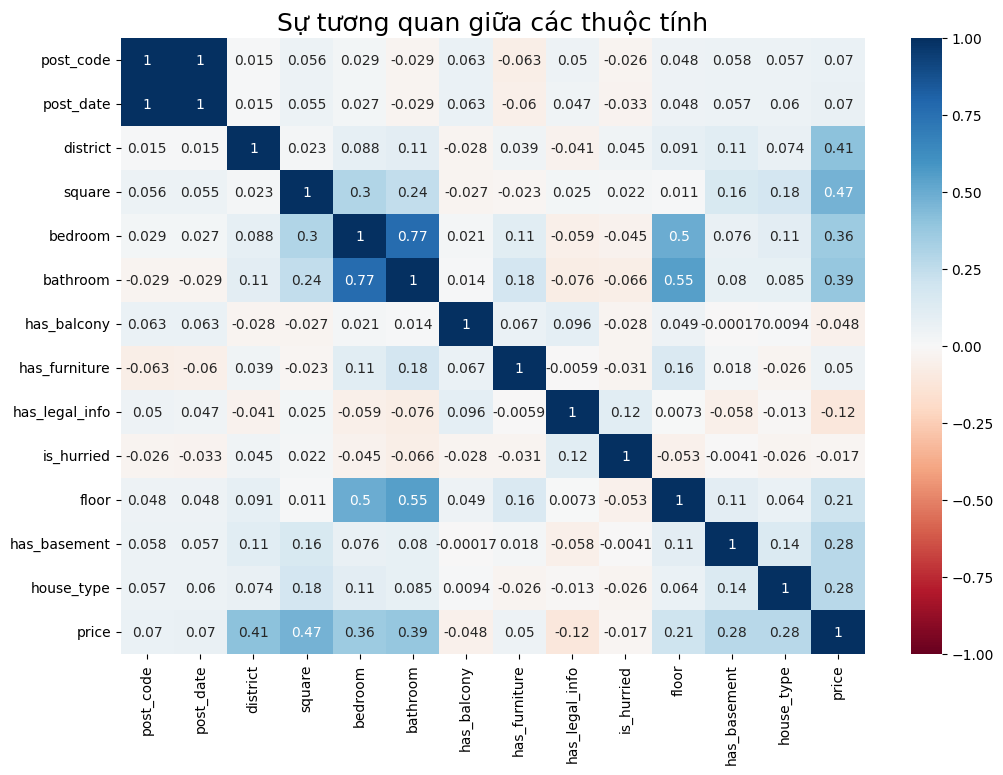

In [ ]:
# Vẽ biểu đồ nhiệt thể hiện sự tương quan giữa các trường dữ liệu
plt.figure(figsize=(12,8))
sns.heatmap(df.drop(columns='house_direction',axis=1).corr(),annot=True, cmap="RdBu", vmin=-1, vmax=1)
plt.title("Sự tương quan giữa các thuộc tính",size=18)
plt.show()

Dựa vào biểu đồ tương quan giữa các thuộc tính, ta có thể thấy rằng `floor` và `square` có ảnh hưởng lớn nhất tới `bedroom` và `bathroom`, vì vậy ta sẽ sử dụng thuật toán K-nearest neighbor để điền những giá trị `bedroom` và `bathroom` bị thiếu.

K-nearest neighbor (hay KNN), một thuật toán được xếp vào loại lazy (machine) learning. KNN là thuật toán đi tìm đầu ra của một điểm dữ liệu mới bằng cách chỉ dựa trên thông tin của K điểm dữ liệu trong tập huấn luyện gần nó nhất (K-lân cận).

Ở bài toán của chúng ta, ta sử dụng những giá trị `bedroom` đã biết để dự đoán những giá trị `bedroom` rỗng

In [ ]:
bedroom_nan_df = df[df['bedroom'].isna()]

train_bedroom=df[["square","bedroom","floor"]]
train_bedroom=train_bedroom.dropna(subset=['bedroom'])

X_bed=train_bedroom[["square","floor"]]
y_bed=train_bedroom["bedroom"]
X_nan=bedroom_nan_df[["square","floor"]]

In [ ]:
from sklearn.preprocessing import Normalizer
scaler=Normalizer()
X_bed=scaler.fit_transform(X_bed)
X_nan=scaler.fit_transform(X_nan)

In [ ]:
# # Sử dụng GridSearch để tìm ra cách điền giá trị null tốt nhất thông qua phương pháp KNN
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.model_selection import GridSearchCV
# from sklearn.neighbors import KNeighborsClassifier
# # define dataset

# # define models and parameters
# model = KNeighborsClassifier()
# n_neighbors = range(1, 20, 1)
# weights = ['uniform', 'distance']
# metric = ['euclidean', 'manhattan', 'minkowski']
# # define grid search
# grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X_bed, y_bed)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 20,weights='distance',metric='euclidean')
clf.fit(X_bed, y_bed)
y_pred = clf.predict(X_nan)
bedroom_nan_df["bedroom"]=y_pred
df.loc[df["bedroom"].isna(), "bedroom"] = bedroom_nan_df["bedroom"]

<ipython-input-267-4b4e5f3067e4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bedroom_nan_df["bedroom"]=y_pred


**Bathroom**

Tương tự như với `bedroom`, ta cũng sử dụng K-nearest neighbor để điền những giá trị `bathroom` rỗng. Nhưng điểm khác của `bathroom` so với `bedroom` là ta có thể sử dụng chính những `bedroom` đã được điền khuyết làm thuộc tính của train set để dự đoán `bathroom`

In [ ]:
# Chia bedroom thành tập null và không null
bathroom_nan_df = df[df['bathroom'].isna()]

train_bathroom=df[["square","floor","bathroom","bedroom"]]
train_bathroom=train_bathroom.dropna(subset=['bathroom'])

X_bath=train_bathroom[["square","floor","bedroom"]]
y_bath=train_bathroom["bathroom"]
X_nan=bathroom_nan_df[["square","floor","bedroom"]]

In [ ]:
from sklearn.preprocessing import Normalizer
scaler=Normalizer()
X_bath=scaler.fit_transform(X_bath)
X_nan=scaler.fit_transform(X_nan)

In [ ]:
# # Sử dụng GridSearch để tìm ra cách điền giá trị null tốt nhất thông qua phương pháp KNN
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.model_selection import GridSearchCV
# from sklearn.neighbors import KNeighborsClassifier
# # define dataset

# # define models and parameters
# model = KNeighborsClassifier()
# n_neighbors = range(1, 20, 1)
# weights = ['uniform', 'distance']
# metric = ['euclidean', 'manhattan', 'minkowski']
# # define grid search
# grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X_bath, y_bath)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
clf = KNeighborsClassifier(n_neighbors = 20,weights='distance',metric='euclidean')
clf.fit(X_bath, y_bath)
y_pred = clf.predict(X_nan)

bathroom_nan_df["bathroom"]=y_pred
df.loc[df["bathroom"].isna(), "bathroom"] = bathroom_nan_df["bathroom"]

<ipython-input-271-3e87ee9ea8d8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bathroom_nan_df["bathroom"]=y_pred


### **V. Lựa chọn thuộc tính**

Ở mục này, nhóm sẽ sử dụng một số phương pháp để đánh giá và chọn lọc thuộc tính nhằm giúp mô hình đưa ra kết quả tối ưu.

Trước hết, `post_code` là thuộc tính không liên quan đến căn nhà, vì vậy ta sẽ loại nó đầu tiên

In [ ]:
df = df.drop(columns=["post_code"],axis=1)

Tiếp theo, thuộc tính `house_direction` chứa quá nhiều giá trị rỗng, vì vậy ta cũng sẽ loại nó đi.

In [ ]:
df = df.drop(columns=["house_direction"],axis=1)

Tiếp đến, ta xem xét sự tương quan giữa các thuộc tính với mục tiêu sau khi đã được xử lý

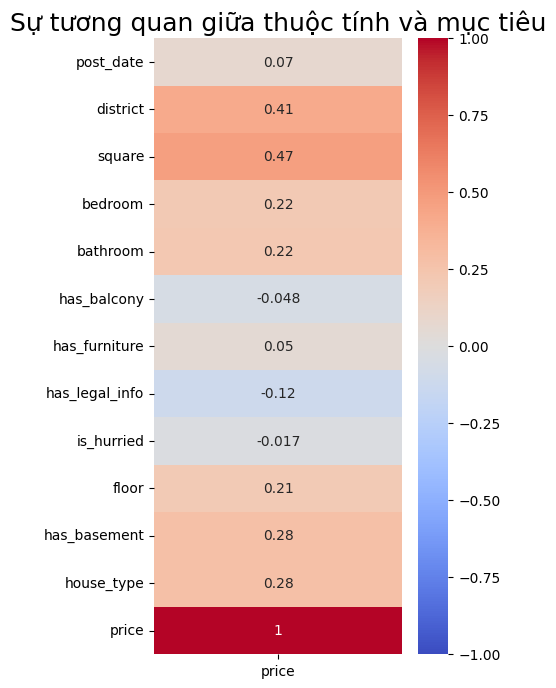

In [ ]:
# Vẽ biểu đồ nhiệt thể hiện sự tương quan giữa các trường dữ liệu
plt.figure(figsize=(4,8))
sns.heatmap(df.corr()[['price']],annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Sự tương quan giữa thuộc tính và mục tiêu",size=18)
plt.show()

Từ biểu đồ tương quan, 7 thuộc tính bao gồm `district`, `square`, `bedroom`, `bathroom`, `floor`, `has_basement` và `house_type` có độ tương quan cao với thuộc tính `price`. Tiếp đến, ta sẽ thông qua MI Score để tạo thêm 1 lớp lọc bảo đảm thuộc tính được chọn là tối ưu nhất.

In [ ]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

df[["district","house_type","bedroom","bathroom"]]=df[["district","house_type","bedroom","bathroom"]].astype(int)

X=df.drop(columns=['price'],axis=1)
y=df['price']

discrete_features = X.dtypes == int
mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores

square            0.335545
post_date         0.179521
district          0.172320
bathroom          0.159948
bedroom           0.148623
floor             0.131722
house_type        0.051917
is_hurried        0.031914
has_basement      0.024902
has_furniture     0.020467
has_legal_info    0.014785
has_balcony       0.010064
Name: MI Scores, dtype: float64

Thông qua tính toán MI Score, 7 thuộc tính có điểm số cao nhất gồm `square`, `post_date`, `bathroom`, `district`, `bedroom`, `floor` và `house_type`. Kết hợp với 7 thuộc tính được chọn ra từ Phương pháp phân tích tương quan, nhóm quyết định chọn 6 thuộc tính để đưa vào xây dựng mô hình, bao gồm: `district`, `square`, `bedroom`, `bathroom`, `floor` và `house_type`

### **VI. Xây dựng mô hình dự đoán**

Với phần mô hình dự đoán, nhóm sử dụng tổng cộng năm mô hình để dự đoán giá tiền, trong đó **Dummy Regressor** dùng giá trị trung bình là mô hình cơ sở. Các mô hình còn lại là **Linear Regression**, **Support Vector Regressor**, **Random Forest Regressor** và **Decision Tree Regressor**.

Hơn nữa, để cho ra một mô hình tối ưu nhất, phương pháp Hyperparamter Tuning sẽ được sử dụng để dự đoán giá nhà tốt nhất. Nhóm quyết định dùng RandomizedSearchSV để tìm kiếm giá trị tham số tối ưu.

Giới thiệu về RandomizedSearchCV (RSCV):
  + RSCV là một kĩ thuật kết hợp một cách ngẫu nhiên các tham số (parameter) trong không gian tham số (parameter space) để tìm ra kết hợp độc đáo nhất - cho hiệu suất tốt nhất
  + Lợi ích:
           1) Có thể xử lí được trên không gian tham số lớn

           2) Linh hoạt và hiệu quả: Không như GridSearchCV, RSCV không tính toán phức tạp, hay kết hợp tất cả các giá trị tham số có trong không gian tham số. RSCV mang lại sự cân bằng về hiệu quả tìm kiếm và độ chính xác trong hiệu chỉnh

In [ ]:
selected_columns = ['district', 'square', 'bedroom', 'bathroom', 'floor', 'house_type']
target = "price"

X = df[selected_columns].copy().values
y = df[target].copy().values.reshape(-1,1)
# dataset = dropper_pipeline.fit_transform(dataset)
# X = feature_processor.fit_transform(dataset[selected_columns])
# y = target_processor.fit_transform(dataset[target])

In [ ]:
from sklearn.dummy import DummyRegressor

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#### **Mô hình cơ sở**

Đây là mô hình đơn giản dự đoán giá nhà, các giá trị được dự đoán sẽ bằng trung bình các giá trị đã được huấn luyện. Nhóm sẽ dùng mô hình là cơ sở so sánh với các mô hình tiên tiến hơn.

In [ ]:
baseline_model = DummyRegressor(strategy='mean')
baseline_model.fit(X_train, y_train)
y_val_pred = baseline_model.predict(X_val)
print(f'MSE: {mean_squared_error(y_val, y_val_pred)}')

MSE: 38.50651306828782


#### **Polynominal Regression**

Linear Regression (Hồi quy tuyến tính) là một phương pháp thống kê được sử dụng để mô tả mối quan hệ giữa một biến phụ thuộc (còn gọi là biến đích hoặc biến dự báo) và một hoặc nhiều biến độc lập (còn gọi là biến giải thích hoặc biến dự báo). Phương trình tổng quát của hồi quy tuyến tính đa biến có dạng:
$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_p X_p + \epsilon
$$
Tuy nhiên đối với bài toán Dự đoán giá nhà, sử dụng Linear Regression sẽ không thu được kết quả tốt do dữ liệu phi tuyến tính. Vì vậy cần phải sử dụng Polynomial Regression (Hồi quy đa thức):
$$
Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \ldots + \beta_d X^d + \epsilon
$$


In [ ]:
# Hồi quy tuyến tính
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_val_pred = lr_model.predict(X_val)
print(f'MSE: {mean_squared_error(y_val, y_val_pred)}')

MSE: 25.2491234645829


In [ ]:
# Tạo Hồi quy đa thức
pipeline = Pipeline([
          ("polynomial_features", PolynomialFeatures(degree=2)), # Qua thử nghiệm cho thấy rằng bậc 2 thường cho ra mô hình với độ chính xác cao nhất
          ("regressor", LinearRegression()),
      ])

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,shuffle=True,random_state=40)
from sklearn.model_selection import GridSearchCV
param_grid = {
    'regressor__fit_intercept': [True, False],
    'regressor__positive': [True, False]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=kf, scoring='neg_root_mean_squared_error')
grid_result=grid_search.fit(X, y)

print('Best MSE: %.3f' % grid_result.best_score_)
print('Config: %s' % grid_result.best_params_)
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best MSE: -4.570
Config: {'regressor__fit_intercept': True, 'regressor__positive': False}
-4.614857 (0.573462) with: {'regressor__fit_intercept': True, 'regressor__positive': True}
-4.570326 (0.551637) with: {'regressor__fit_intercept': True, 'regressor__positive': False}
-4.646037 (0.562359) with: {'regressor__fit_intercept': False, 'regressor__positive': True}
-4.570326 (0.551637) with: {'regressor__fit_intercept': False, 'regressor__positive': False}


In [ ]:
grid_search.best_params_

{'regressor__fit_intercept': True, 'regressor__positive': False}

In [ ]:
lr_best_params = {'fit_intercept': True, 'positive': False}
lr_best_model = Pipeline([
          ("scaler", MinMaxScaler()),
          ("polynomial_features", PolynomialFeatures(degree=2)),
          ("regressor", LinearRegression(**lr_best_params)),
      ])

lr_best_model.fit(X_train, y_train)
y_val_pred = lr_best_model.predict(X_val)
print(f'MSE: {mean_squared_error(y_val, y_val_pred)}')

MSE: 22.8823073064827


#### **Support Vector Regressor**

Support Vector Regressor là một thuật toán học máy tiên tiến, nó hoạt động bằng cách tìm một siêu phẳng dùng để dự đoán các giá trị. Ý tưởng như sau:
- Tìm kiếm đường thẳng sao cho sai số dự đoán cho các điểm dữ liệu huấn luyện nhỏ nhất có thể. Sai số dự đoán được tính toán bằng cách lấy khoảng cách giữa giá trị thực tế và giá trị dự đoán cho mỗi điểm dữ liệu.
- Đường thẳng có sai số dự đoán nhỏ nhất được gọi là đường thẳng hồi quy tối ưu.
- Các điểm dữ liệu nằm gần đường thẳng hồi quy tối ưu nhất được gọi là vectơ hỗ trợ (support vectors).

In [ ]:
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_val_pred = svr_model.predict(X_val)
print(f'MSE: {mean_squared_error(y_val, y_val_pred)}')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE: 26.575111515846125


Các siêu tham số của Support Vector Regressor bao gồm:
- `kernel`: tham số chọn lựa các loại mặt phù hợp, gồm `linear`, `rbf`, `poly` và `sigmoid`
- `epsilon`: tham số giá trị biên
- `C`: điều chỉnh hệ số 'phạt' đối với các điểm ở ngoài biên
- `gamma`: hệ số hạt nhân điều hành, áp dụng với `rbf`, `poly` và `sigmoid`

In [ ]:
X_scaled = MinMaxScaler().fit_transform(X)

# hyperparameter tuning
param_grid = {'C': np.arange(1, 101, 5),
            'gamma': [1, 0.1, 0.01, 'scale', 'auto'],
            'epsilon': np.arange(0.1, 11, 0.5),
            'kernel': ['rbf', 'poly'],}

param_search = RandomizedSearchCV(SVR(), param_grid, scoring='neg_root_mean_squared_error', n_jobs=-1, cv = 4, random_state=42)
param_search.fit(X_scaled, y.ravel())
print(param_search.best_params_)

{'kernel': 'rbf', 'gamma': 'scale', 'epsilon': 1.1, 'C': 11}


In [ ]:
# Các tham số tốt nhất
svr_best_params = {'kernel': 'rbf', 'gamma': 'scale', 'epsilon': 1.1, 'C': 11}

In [ ]:
svr_best_model = SVR(**svr_best_params)
svr_best_model.fit(X_train, y_train)
y_val_pred = svr_best_model.predict(X_val)
print(f'MSE: {mean_squared_error(y_val, y_val_pred)}')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE: 23.50040835753734


#### **Random Forest Regressor**

Random Forest Regressor là một thuật toán `ensemble learning` cho hồi quy bằng cách xây dựng đồng thời nhiều Decision Tree cùng một lúc khi đào tạo và kết hợp với kĩ thuật `Bagging`. Đầu ra của bài toán là trung bình dự đoán của các Decision Tree

Ý tưởng của Random Forest Regressor:
+ Sử dụng nhiều Decision Tree được huấn luyện đồng thời trên các tập khác nhau của cùng tập huấn luyện nhằm mục đích giảm phương sai. Tuy nhiên, độ lệch sẽ tăng nhưng nhìn chung thì hiệu suất của mô hình tăng đáng kể
+ Kĩ thuật `Bagging` được áp dụng cho Random Forest nhằm giảm phương sai nhưng không làm tăng độ lệch
+ Sơ bộ về kĩ thuật `Bagging` trong Random Forest: Một mẫu dữ liệu trong tập train sẽ được chọn có hoàn lại - nghĩa là các dữ liệu có thể được chọn nhiều lần (trùng lặp). Sau khi có các mẫu dữ liệu thì tạo ra các Decision Tree độc lập trên các mẫu dữ liệu đó. Đầu ra của bài toán là giá trị trung bình dự đoán của các Decision Tree

In [ ]:
rfr_model = RandomForestRegressor()
rfr_model.fit(X_train, y_train)
y_val_pred = rfr_model.predict(X_val)
print(f'MSE: {mean_squared_error(y_val, y_val_pred)}')

<ipython-input-289-2cbc25280b41>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr_model.fit(X_train, y_train)


MSE: 23.498894822379434


* Các tham số đã tìm hiểu để chỉnh:
  + `n_estimators`: Số lượng cây trong rừng

  + `max_depth`: Độ sâu tối đa của cây (None = Không giới hạn)

  + `min_samples_split`: Số lượng mẫu tối thiểu cần thiết để chia một node nội bộ

  + `max_features`: Số lượng feature cần xem xét khi tìm kiếm sự phân chia tốt nhất (None = Tất cả feature)

  + `max_leaf_nodes`: Số lượng node lá tối đa của cây (tránh overfit)

  + `min_samples_leaf`: Số lượng mẫu tối thiểu cần thiết để trở thành một node lá

  + `max_samples`: Số lượng mẫu tối đa được dùng cho cây (một phần của kĩ thuật bagging)


In [ ]:
# from scipy.stats import randint
# from sklearn.model_selection import RandomizedSearchCV

# param_distributions = {'n_estimators': np.arange(10, 500, step=50),
#                        'max_depth': list(np.arange(10, 100, step=10)) + [None],
#                        'min_samples_split': np.arange(2, 11, step=1),
#                        'max_features': ['sqrt', 'log2'] + [None] + list(np.arange(1, 9, 1)),
#                        'max_leaf_nodes': list(np.arange(10, 100, step=10)) + [None],
#                        'min_samples_leaf': randint(1, 5),
#                        'max_samples': [0.5, 0.7, 0.9, None]}

# model = RandomForestRegressor(bootstrap=True) #Áp dụng kĩ thuật bagging

# random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions,
#                                    n_iter=50, cv=3, scoring='neg_mean_squared_error',
#                                    verbose=1, random_state=42, n_jobs=-1)

# random_search.fit(X_scaled, y)

# print("Best parameters found: ", random_search.best_params_)

In [ ]:
#Các tham số tốt nhất tìm được sau khi chạy thuật toán trên
rfr_best_params = {'max_depth': None, 'max_features': 4, 'max_leaf_nodes': None, 'max_samples': 0.5, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 410}

rfr_best_model = RandomForestRegressor(**rfr_best_params, criterion='squared_error', bootstrap=True)
rfr_best_model.fit(X_train, y_train)
y_val_pred_rfr = rfr_best_model.predict(X_val)
print(f'MSE: {mean_squared_error(y_val, y_val_pred_rfr)}')

<ipython-input-291-5c8b2f226228>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr_best_model.fit(X_train, y_train)


MSE: 21.293710478387244


#### **Decision Tree Regressor**

Cây quyết định là một thuật toán **học có giám sát** phi tham số cho các nhiệm vụ phân loại và hồi quy . Nó có cấu trúc cây phân cấp bao gồm một nút gốc, các nhánh, các nút bên trong và các nút lá. Cây quyết định được sử dụng cho các nhiệm vụ phân loại và hồi quy, cung cấp các mô hình dễ hiểu.

Cây quyết định hoạt động như thế nào?

1. Chọn thuộc tính tốt nhất : Sử dụng số liệu như tạp chất Gini, entropy hoặc mức tăng thông tin, thuộc tính tốt nhất để phân chia dữ liệu sẽ được chọn.
2. Tách tập dữ liệu : Tập dữ liệu được chia thành các tập con dựa trên thuộc tính đã chọn.
3. Lặp lại quy trình : Quy trình được lặp lại đệ quy cho từng tập hợp con, tạo một nút bên trong hoặc nút lá mới cho đến khi đáp ứng tiêu chí dừng (ví dụ: tất cả các phiên bản trong một nút thuộc về cùng một lớp hoặc đạt đến độ sâu được xác định trước).

In [ ]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_val)
mse_train = mean_squared_error(y_val, y_pred)


In [ ]:
# # Hiệu chỉnh bằng GridSearchCV
# dt = DecisionTreeRegressor(random_state = 1234)
# param_grid = {
#     'max_depth': [5, 10, 15, 20, 30, 50], # Độ sâu tối đa của cây.
#     'min_samples_split': [5, 10, 15, 20, 30, 50],  # Số lượng mẫu tối thiểu cần thiết để chia một nút nội bộ.
#     'min_samples_leaf': [1, 2, 4, 6, 8],  # Số lượng mẫu tối thiểu cần thiết để trở thành một nút lá.
#     'max_features': [10, 15, 20,'auto', 'sqrt', 'log2'],  # Số lượng đặc trưng cần xem xét khi tìm kiếm sự phân chia tốt nhất.
#     'criterion': ['poisson', 'squared_error', 'friedman_mse']  # Phương pháp đo
# }
# from sklearn.model_selection import RandomizedSearchCV

# # Khởi tạo GridSearchCV object
# grid_search = RandomizedSearchCV(estimator=dt, param_distributions=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1, random_state=42)

# # Fit GridSearchCV object với dữ liệu

# grid_search.fit(X_scaled, y)

# # Lấy tham số và score tốt nhất
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Tham số tốt nhất:", best_params)
# print("Score tốt nhất:", best_score)

Các siêu tham số của Decision Tree bao gồm:
- `max_depth`: Độ sâu tối đa của cây
- `min_samples_split`: Số lượng mẫu tối thiểu cần thiết để chia một nút nội bộ.
- `min_samples_leaf`: Số lượng mẫu tối thiểu cần thiết để trở thành một nút lá.
- `max_features`: Số lượng đặc trưng cần xem xét khi tìm kiếm sự phân chia tốt nhất.

In [ ]:
# Thiết lập mô hình hồi quy với tổ hợp tham số tốt nhất
dtr_best_param = {'min_samples_split': 30, 'min_samples_leaf': 1, 'max_features': 15, 'max_depth': 10, 'criterion': 'squared_error'}

dt = DecisionTreeRegressor(**dtr_best_param)
dt.fit(X_train, y_train)

# Kiểm tra hiệu suất trên tập huấn luyện
y_train_pred_dt = dt.predict(X_train)

# Performance metrics
mse_test_dt = mean_squared_error(y_train, y_train_pred_dt)

print("MSE Train:", mse_test_dt)
# Kiểm tra hiệu suất trên tập test
y_test_pred_dt = dt.predict(X_val)

# Performance metrics
mse_test_dt = mean_squared_error(y_val, y_test_pred_dt)
print("MSE test:", mse_test_dt)

MSE Train: 15.966281920478453
MSE test: 27.43338483293347


### **VII. Đánh giá mô hình**

Ở phần đánh giá mô hình, nhóm sẽ tính toán các thông số của mô hình, bao gồm các chỉ số đánh giá, thời gian chạy, và dung lượng sử dụng. Sau đó thông qua các số liệu này, chúng em sẽ so sánh và chọn ra mô hình tối ưu và hiệu quả nhất.

Khởi tạo các phép đo đánh giá

In [ ]:
!pip install memory_profiler psutil

import time
import psutil
from memory_profiler import memory_usage
from sklearn.model_selection import cross_validate

# Define the scoring dictionary
scoring = {
    'neg_mean_absolute_error': 'neg_mean_absolute_error',
    'neg_mean_squared_error': 'neg_mean_squared_error',
    'neg_root_mean_squared_error': 'neg_root_mean_squared_error'
}

In [ ]:
def profile_cross_validate(pipeline, X, y, cv, scoring):
    def cross_val_pipeline():
        nonlocal cv_results
        cv_results = cross_validate(pipeline, X, y, cv=cv, scoring=scoring)

    cv_results = None
    start_time = time.time()
    mem_usage = memory_usage(cross_val_pipeline, interval=1, timeout=None)

    end_time = time.time()
    elapsed_time = end_time - start_time
    avg_memory_usage = sum(mem_usage) / len(mem_usage)
    cpu_usage = psutil.cpu_percent(interval=1)

    cv_results = pd.DataFrame(cv_results).mean().round(2)
    cv_results.drop(['fit_time', 'score_time'], axis=0, inplace=True)
    cv_results.index = ['MAE', 'MSE', 'RMSE']

    cv_results['elapsed_time'] = elapsed_time
    cv_results['avg_memory_usage'] = avg_memory_usage
    cv_results['cpu_usage'] = cpu_usage

    return cv_results

# def profile_cross_validate(pipeline, X, y, cv, scoring):
#     return pd.DataFrame(cross_validate(pipeline, X, y, cv=cv, scoring=scoring, return_train_score=True)).mean().round(2)

Tính toán chỉ số của từng mô hình

In [ ]:
baseline_result = profile_cross_validate(baseline_model, X, y, cv=5, scoring=scoring)

# Linear Regression
lr_best_params = {'fit_intercept': False, 'positive': True}
lr_pipeline = Pipeline([
          ("scaler", MinMaxScaler()),
          ("polynomial_features", PolynomialFeatures(degree=2)),
          ("regressor", LinearRegression(**lr_best_params)),
])
lr_result = profile_cross_validate(lr_pipeline, X, y.ravel(), cv=5, scoring=scoring)

# Support Vector Regressor

svr_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('svr', SVR(**svr_best_params))
])
svr_result = profile_cross_validate(svr_pipeline, X, y.ravel(), cv=5, scoring=scoring)

# Random Forest Regressor
rfr_best_params = {'max_depth': 90, 'max_features': None,'max_leaf_nodes': 70,
                      'max_samples': 0.7, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 210
}
rfr_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('rdf_reg', RandomForestRegressor(**rfr_best_params,
                                      criterion='squared_error',
                                      bootstrap=True))
])
rfr_result = profile_cross_validate(rfr_pipeline, X, y.ravel(), cv=5, scoring=scoring)

# Desicion Tree Regressor
dtr_best_param = {'criterion': 'poisson', 'max_depth': 10, 'max_features': 10,
                  'min_samples_leaf': 8, 'min_samples_split': 50
}

dtr_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('dtr', DecisionTreeRegressor(**dtr_best_param))
])
dtr_result = profile_cross_validate(dtr_pipeline, X, y.ravel(), cv=5, scoring=scoring)

In [ ]:
# Gọp tất cả kết quả vào DataFrame
model_benchmark = pd.concat([baseline_result, svr_result, lr_result, rfr_result, dtr_result], axis=1)
model_benchmark.columns = ['Baseline', 'SVR', 'Polynominal Regression', 'Random Forest Regressor', 'Decision Tree Regressor']
model_benchmark

,Baseline,SVR,Polynominal Regression,Random Forest Regressor,Decision Tree Regressor
MAE,-3.650000,-2.300000,-2.410000,-2.420000,-2.570000
MSE,-40.600000,-22.060000,-22.040000,-22.450000,-25.020000
RMSE,-6.340000,-4.670000,-4.680000,-4.710000,-4.980000
elapsed_time,0.237885,15.846025,0.550898,15.006722,0.655896
avg_memory_usage,489.980469,493.023655,489.980469,496.000000,496.000000
cpu_usage,10.400000,90.500000,11.100000,74.000000,93.500000


**So sánh mô hình**

- So sánh độ sai khác

Tách `elapsed_time`, `avg_memory_usage` và `cpu_usage` để so sánh sau

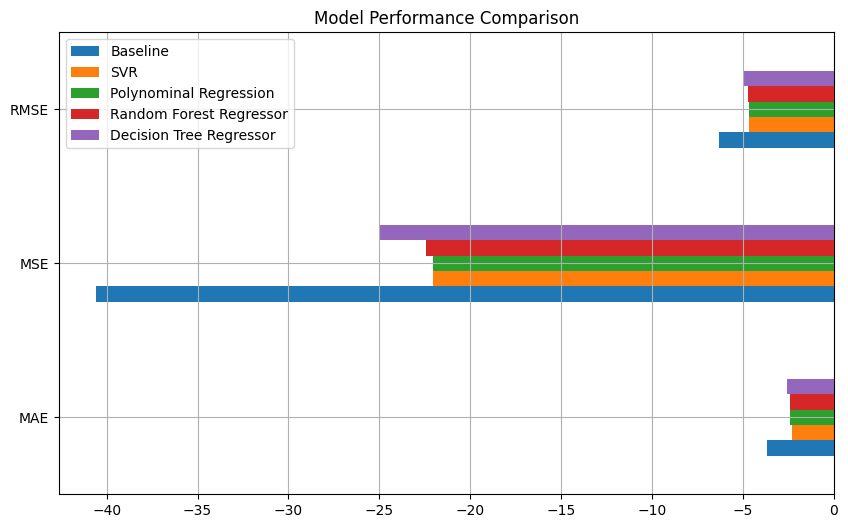

In [ ]:
import matplotlib.pyplot as plt
error_benchmark = model_benchmark.drop(['elapsed_time', 'avg_memory_usage', 'cpu_usage'], axis=0).copy()

error_benchmark.plot.barh(figsize=(10, 6) )
plt.title('Model Performance Comparison')
plt.grid(True)
plt.show()

Thông qua so sánh độ sai khác, **Support Vector Machine** và **Linear Regression** là 2 mô hình cho ra kết quả nhất trong cả 5 mô hình. Vì vậy, nhóm sẽ dùng thời gian chạy và dung lượng tiêu tốn để tiếp tục so sánh.

- So sánh thời gian chạy và dung lượng tiêu tốn

Text(0.5, 1.0, 'Runtime and Usage')

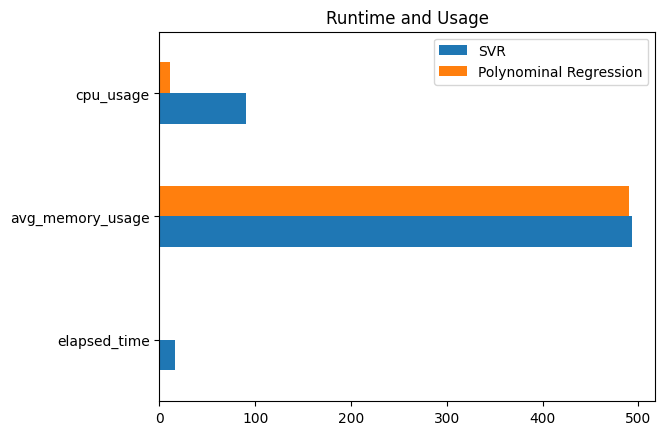

In [ ]:
selected_benchmark = model_benchmark[['SVR', 'Polynominal Regression']].copy()
selected_benchmark.drop(['MSE', 'MAE', 'RMSE'], axis=0, inplace=True)

selected_benchmark.plot.barh()
plt.title('Runtime and Usage')

Như biểu đồ đã thể hiện, **Polynominal Regression** vượt trội hơn so với **Support Vector Machine** về cả thời gian chạy lẫn dung lượng tiêu tốn. Vì vậy **Polynominal Regression** sẽ là mô hình tối ưu nhất.

### **VIII. Kiểm tra với dữ liệu mới**

#### **Xây dựng Pipeline**

Mục đích xây dựng pipeline nhằm giúp xử lý dữ liệu mới đầu vào về dạng đúng chuẩn một cách nhanh chóng. Vì vậy Pipeline chỉ chứa những khâu cần thiết loại bỏ dữ liệu và điều chỉnh về dữ liệu dạng mong muốn với các thuộc tính đã được tìm ra từ trước.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler, Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

Loại bỏ giá trị

In [ ]:
def outlier_remover(X, column_names):
    def remove_outliers_iqr(X, column_name):
        series = X[column_name]
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return X[(series >= lower_bound) & (series <= upper_bound)]

    for col in column_names:
        X = remove_outliers_iqr(X, col)
    return X

def out_range_remover(X, column_names, lower_bound=-np.inf, upper_bound=np.inf, keep_nan=False):
    for col in column_names:
        if keep_nan:
            X = X[((X[col] >= lower_bound) & (X[col] <= upper_bound)) | (X[col].isnull())]
        else:
            X = X[(X[col] >= lower_bound) & (X[col] <= upper_bound)]
    return X

def nan_dropper(X, column_names):
    for col in column_names:
        X = X.dropna(subset=[col])

    if X.empty:
        print("Data after nan removal is empty. Criteria not met.")
    return X

# ========================================================================================================
dropper_pipeline = Pipeline([
    ('outlier_remover', FunctionTransformer(outlier_remover, kw_args={"column_names": ['floor']})),
    ('invalid_room_remover', FunctionTransformer(out_range_remover, kw_args={"column_names": ['bedroom', 'bathroom'], "lower_bound":-np.inf, "upper_bound": 6, "keep_nan": True})),
    ('square_out_range_dropper', FunctionTransformer(out_range_remover, kw_args={"column_names": ['square'], "lower_bound": square_lower_threshhold, "upper_bound": square_upper_threshhold})),
    ('nan_drop_transformer', FunctionTransformer(nan_dropper, kw_args={"column_names": ['square']}))
])

dropper_pipeline.fit(dataset)
dataset = dropper_pipeline.transform(dataset)
X_dataset = dataset.copy()[selected_columns]
y_dataset = dataset.copy()[target]

In [ ]:
X_dataset

,district,square,bedroom,bathroom,floor,house_type
0,Nhà Bè,150.0,2.0,1.0,0,nhà riêng
1,Tân Bình,51.0,NaN,NaN,3,nhà riêng
2,Phú Nhuận,45.0,2.0,2.0,2,nhà riêng
6,Thủ Đức,180.0,NaN,NaN,0,nhà riêng
8,Bình Thạnh,33.0,3.0,3.0,3,nhà riêng
...,...,...,...,...,...,...
10043,Gò Vấp,43.0,2.0,2.0,2,nhà riêng
10044,Bình Tân,65.0,4.0,5.0,5,nhà riêng
10045,Quận 7,250.0,5.0,3.0,4,nhà mặt phố
10047,Tân Phú,80.0,3.0,NaN,3,nhà riêng


Chuyển đổi dữ liệu

In [ ]:
for key, val in category_mapping.items():
    number = val['encoded_value']
    category_mapping[key] = number

In [ ]:
class RoomFiller(BaseEstimator, TransformerMixin):
    def __init__(self, feature_cols, target_col, n_neighbors=18, weights='distance', metric='euclidean',):
        self.n_neighbors = n_neighbors
        self.weights = weights
        self.metric = metric

        self.feature_cols = feature_cols
        self.target_col = target_col
        self.knn = KNeighborsClassifier(n_neighbors=self.n_neighbors, weights=self.weights, metric=self.metric)

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        temp_list = self.feature_cols + [self.target_col]

        # Proceed with the transformation if all columns are present
        temp_set = X[temp_list].dropna(subset=[self.target_col])
        self.X_ = temp_set[self.feature_cols]
        self.y_ = temp_set[self.target_col]

        scaler = Normalizer()
        self.X_ = scaler.fit_transform(self.X_)

        self.knn.fit(self.X_, self.y_)

        temp_nan_df = X[X[self.target_col].isna()].copy()
        if not temp_nan_df.empty:
            X_nan = temp_nan_df[self.feature_cols]
            scaler = Normalizer()
            X_nan = scaler.transform(X_nan)
            y_pred = self.knn.predict(X_nan)
            temp_nan_df.loc[:, self.target_col] = y_pred
            X.loc[X[self.target_col].isna(), self.target_col] = temp_nan_df[self.target_col]

        return X

class MapEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, encoder_map, column_name): # Add column_name here
        self.encoder_map = encoder_map
        self.column_name = column_name # Store column_name

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Apply mapping to the specified column
        X[self.column_name] = X[self.column_name].map(self.encoder_map).fillna(X[self.column_name])
        return X

    def fit_transform(self, X, y=None):
        return self.fit(X).transform(X)

# ---------------------------------------------------------------------------------------------------------------------------------
district_pipeline = Pipeline([
    ('district_encoder',  MapEncoder(encoder_map = category_mapping, column_name = 'district'))
])
house_type_pipeline = Pipeline([
    ('house_type_encoder',  (MEstimateEncoder(cols=['house_type'], m=2)))
])

bedroom_pipeline = Pipeline([
    ('bedroom_imputer', RoomFiller(feature_cols=['floor', 'square'], target_col='bedroom', n_neighbors=19, weights='distance'))
])
bathroom_pipeline = Pipeline([
    ('bathroom_imputer', RoomFiller(feature_cols=['floor', 'square', 'bedroom'], target_col='bathroom', n_neighbors=18, metric='manhattan'))
])
feature_processor = Pipeline([
    ('bedroom_imputer', bedroom_pipeline),
    ('bathroom_imputer', bathroom_pipeline),
    ('district_encoder', district_pipeline),
    ('house_type_encoder', house_type_pipeline),
    # ('scaler', MinMaxScaler()),
    # ('poly', PolynomialFeatures(degree=2))
])

feature_processor.fit(X_dataset, y_dataset)
X_dataset = feature_processor.transform(X_dataset)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Normalizer was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Normalizer was fitted without feature names
  warnings.warn(


Mô hình dự đoán

In [ ]:
model = LinearRegression(**lr_best_params)
model.fit(X_dataset, y_dataset)

LinearRegression(fit_intercept=False, positive=True)

In [ ]:
X_dataset

,district,square,bedroom,bathroom,floor,house_type
0,8.320586,150.0,2.0,1.0,0,7.052619
1,7.330555,51.0,4.0,3.0,3,7.052619
2,8.285548,45.0,2.0,2.0,2,7.052619
6,7.711357,180.0,2.0,2.0,0,7.052619
8,7.522150,33.0,3.0,3.0,3,7.052619
...,...,...,...,...,...,...
10043,6.472614,43.0,2.0,2.0,2,7.052619
10044,5.646289,65.0,4.0,5.0,5,7.052619
10045,7.747010,250.0,5.0,3.0,4,10.987204
10047,6.156918,80.0,3.0,3.0,3,7.052619


#### **Dự đoán giá nhà**

In [ ]:
# chuyển đổi dữ liệu
new_data = na_dataset.copy()[selected_columns]
new_data = dropper_pipeline.transform(new_data)
new_data = feature_processor.transform(new_data)

predicted_prices = model.predict(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Normalizer was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Normalizer was fitted without feature names
  warnings.warn(


In [ ]:
print(predicted_prices[:5])

[10.05109895  6.97596113  6.8981486   6.48846404 17.1697515 ]


---
## **Tổng kết**

### **Kết luận**

Trong phạm vi dữ liệu được khảo sát, các yếu tố ảnh hưởng đến giá nhà bao gồm vị trí, diện tích, số phòng và loại nhà. Mô hình học máy được xây dựng dựa trên những yếu tố này đã cho thấy khả năng dự đoán đáng tin cậy, cung cấp thông tin hữu ích cho các bên liên quan.

Kết quả của mô hình không chỉ hỗ trợ các quyết định mua bán nhà mà còn mang lại giá trị thực tiễn cho những ai có nhu cầu đầu tư nhà ở. Nhìn chung, việc áp dụng các thuật toán học máy trong dự đoán giá nhà mở ra nhiều triển vọng và cơ hội, góp phần làm cho thị trường bất động sản trở nên minh bạch và hiệu quả hơn.

Qua bài báo cáo này, chúng em hy vọng đã cung cấp được những thông tin hữu ích mang giá trị tham khảo lâu dài.


### **Các vấn đề, thử thách đã gặp**

#### Làm sạch dữ liệu

- Việc lấy một số lượng lớn dữ liệu tốn khá nhiều thời gian
- Phân tách các dữ liệu cần thiết từ nội dung và tiêu đề
  - Khi sử dụng Regex có thể sai sót do không thể bao quát hết các trường hợp
  - Nếu sử dụng LLM để lấy dữ liệu sẽ phải cần kiểm soát thời gian trả kết quả của mô hình -> khó vì có nhiều dữ liệu làm thời gian để có được dữ liệu chính xác cuối cùng rát lâu
- Các dữ liệu rác rất đa dạng và phải dùng nhiều phương hướng tiếp cận để loại bỏ.

#### Tiền xử lí dữ liệu



*   Dữ liệu trong các cột tồn tại ở nhiều kiểu khác nhau gây tốn thời gian trong việc số hóa
*   Dữ liệu có thiên hướng phân phối lệch phải, không tuân theo dạng chuẩn nên cần sử dụng phương pháp Percentile kết hợp với kiến thức thực tế về dữ liệu để loại bỏ các giá trị ngoại lai, không thể sử dụng IQR đối với 'price' và 'square'

*   Do bộ dữ liệu đầu vào không có huyện Cần Giờ nên cần phải tự đánh giá để đưa ra phương pháp số hóa để phục vụ cho việc dự đoán giá có thể xảy ra
*   'house_direction' chứa quá nhiều dữ liệu null nên phải xem xét loại bỏ






#### Lựa chọn thuộc tính




*   Thuộc tính `has_legal_info` có chiều hướng sai khác so với thực tế, mặc dù theo biểu đồ nhiệt và mi-score có ảnh hưởng tới `price`, tuy nhiên không thể lựa chọn




### **Hạn chế và Phương hướng cải thiện**



*   Việc số hóa 'Cần Giờ' chỉ dựa trên đánh giá chủ quan thông qua tính toán đơn giản, chưa được kiểm nghiệm chặt chẽ thông qua thực tế => Bổ sung các dữ liệu ở các trang web khác để tăng tính chính xác
*   Tính thiếu chính xác của dữ liệu khi được lấy từ website => Cần có các phương pháp giúp dẩy nhanh thời gian lấy từ dữ liệu lớn


#### Các thành viên nhóm và độ đóng góp:

- Đặng Minh Phúc (28.635%)
- Nguyễn Lê Lâm Phúc (24.875%)
- Nguyễn Thuận Phát (24.125%)
- Mai Thị Kim Ngân (22.375%)